In [22]:
from solution_sim import solve
from graph_generator import *
from QUBO_transformers import *

# Примеры построения графов

## Регулярный граф (10 узлов/4 вершины)

In [23]:
Q, G = generate_random_regular_graph_qubo(10, 3, seed = 42, vis = True)

In [24]:
def probs2bit_str(probs: np.array) -> str:
    size = int(np.log2(probs.shape[0]))
    bit_s_num = int(np.argmax(probs))
    s = f"{bit_s_num:0{size}b}"
    return s

x_our = solve(Q) #наше решение
our_cost = x_our @ Q @ x_our

### СТРОИМ ГАМИЛТЬТОНИАН ИЗИНГА ###
H = qubo_to_ising(-Q)

print("Building Hamiltonian of shape:", H.shape)
eigenvals, eigenvecs = sp.linalg.eigsh(H, k=1, which='SR')
energy = eigenvals[0]
gs = eigenvecs[:, 0]
probs = np.abs(gs) ** 2
x_ising = probs2bit_str(probs)
x_ising = list(map(int, list(x_ising)))

ising_cost = x_ising @ Q @ x_ising

Building Hamiltonian of shape: (1024, 1024)


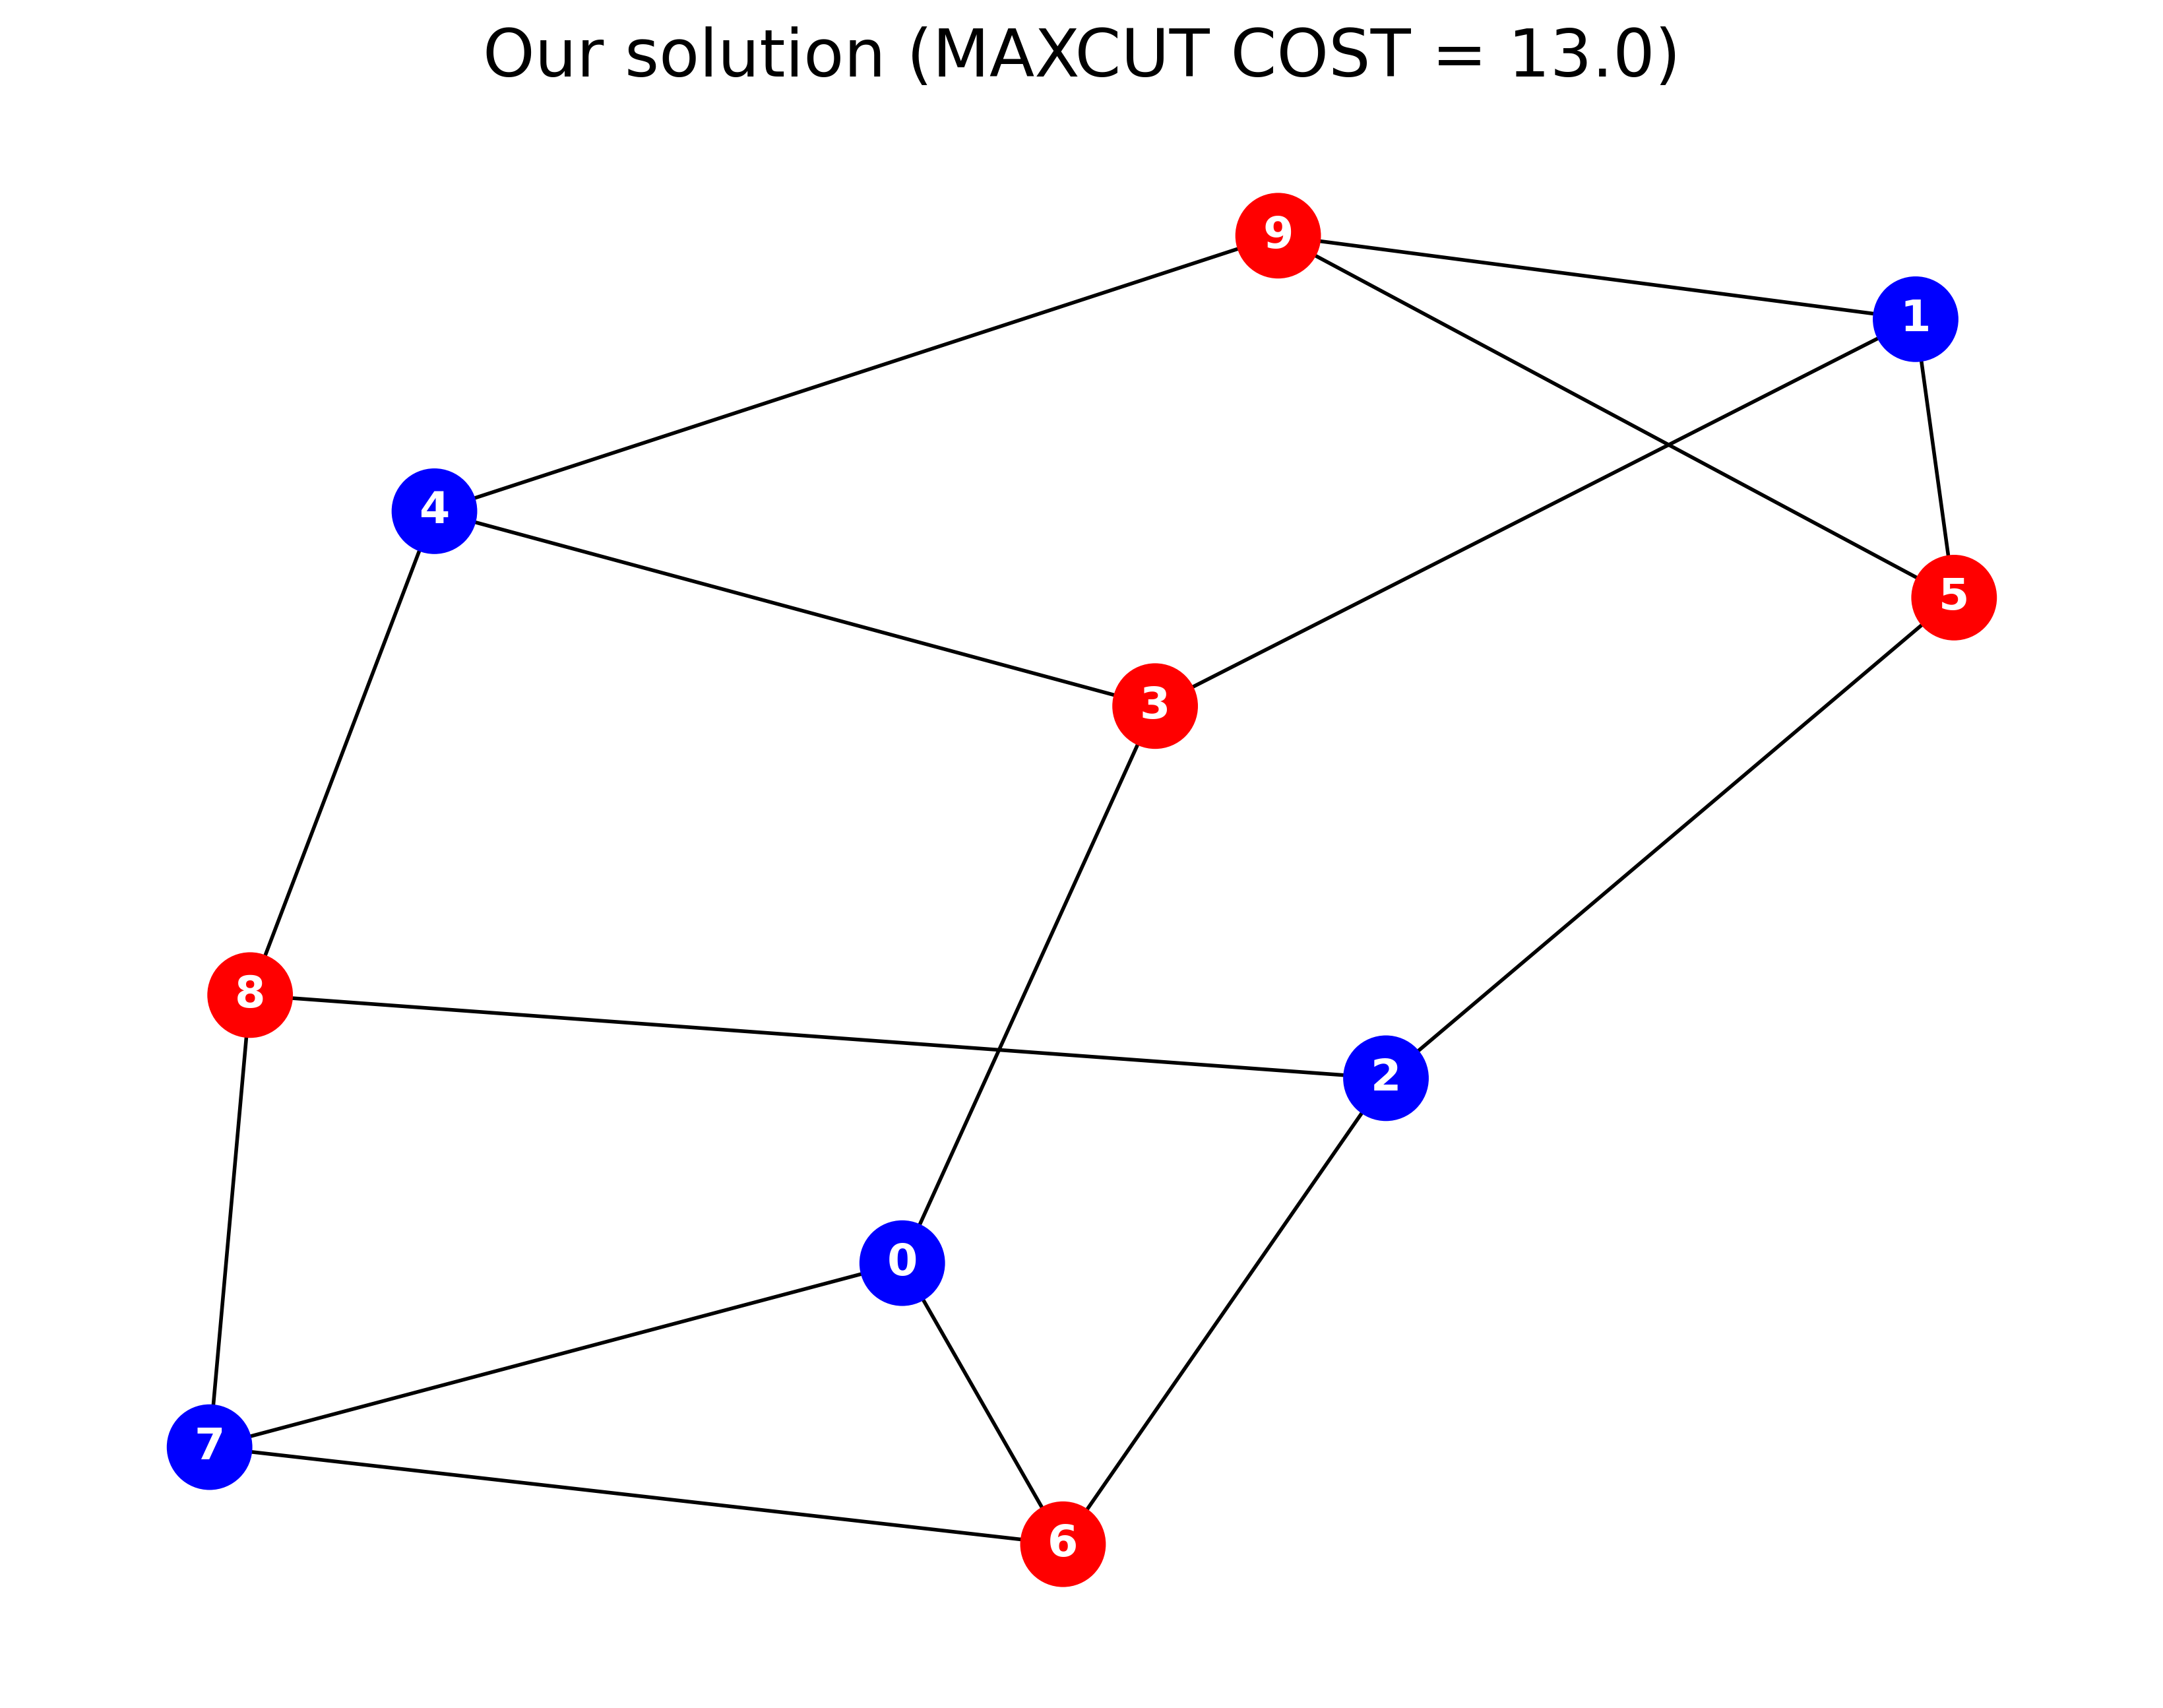

In [25]:
node_list = list(G.nodes())
node_colors_map = dict(zip(node_list, x_our))

for node, color_val in node_colors_map.items():
    G.nodes[node]['color'] = color_val

color_map_for_drawing = ['red' if node_colors_map[node] == 1 else 'blue' for node in node_list]

plt.figure(figsize=(8, 6), dpi = 400)
pos = nx.spring_layout(G, seed = 42)
nx.draw(G, pos, with_labels=True, node_color=color_map_for_drawing, node_size=500, font_color='white', font_weight='bold')
plt.title(f"Our solution (MAXCUT COST = {our_cost})", fontsize = 18)
plt.show()

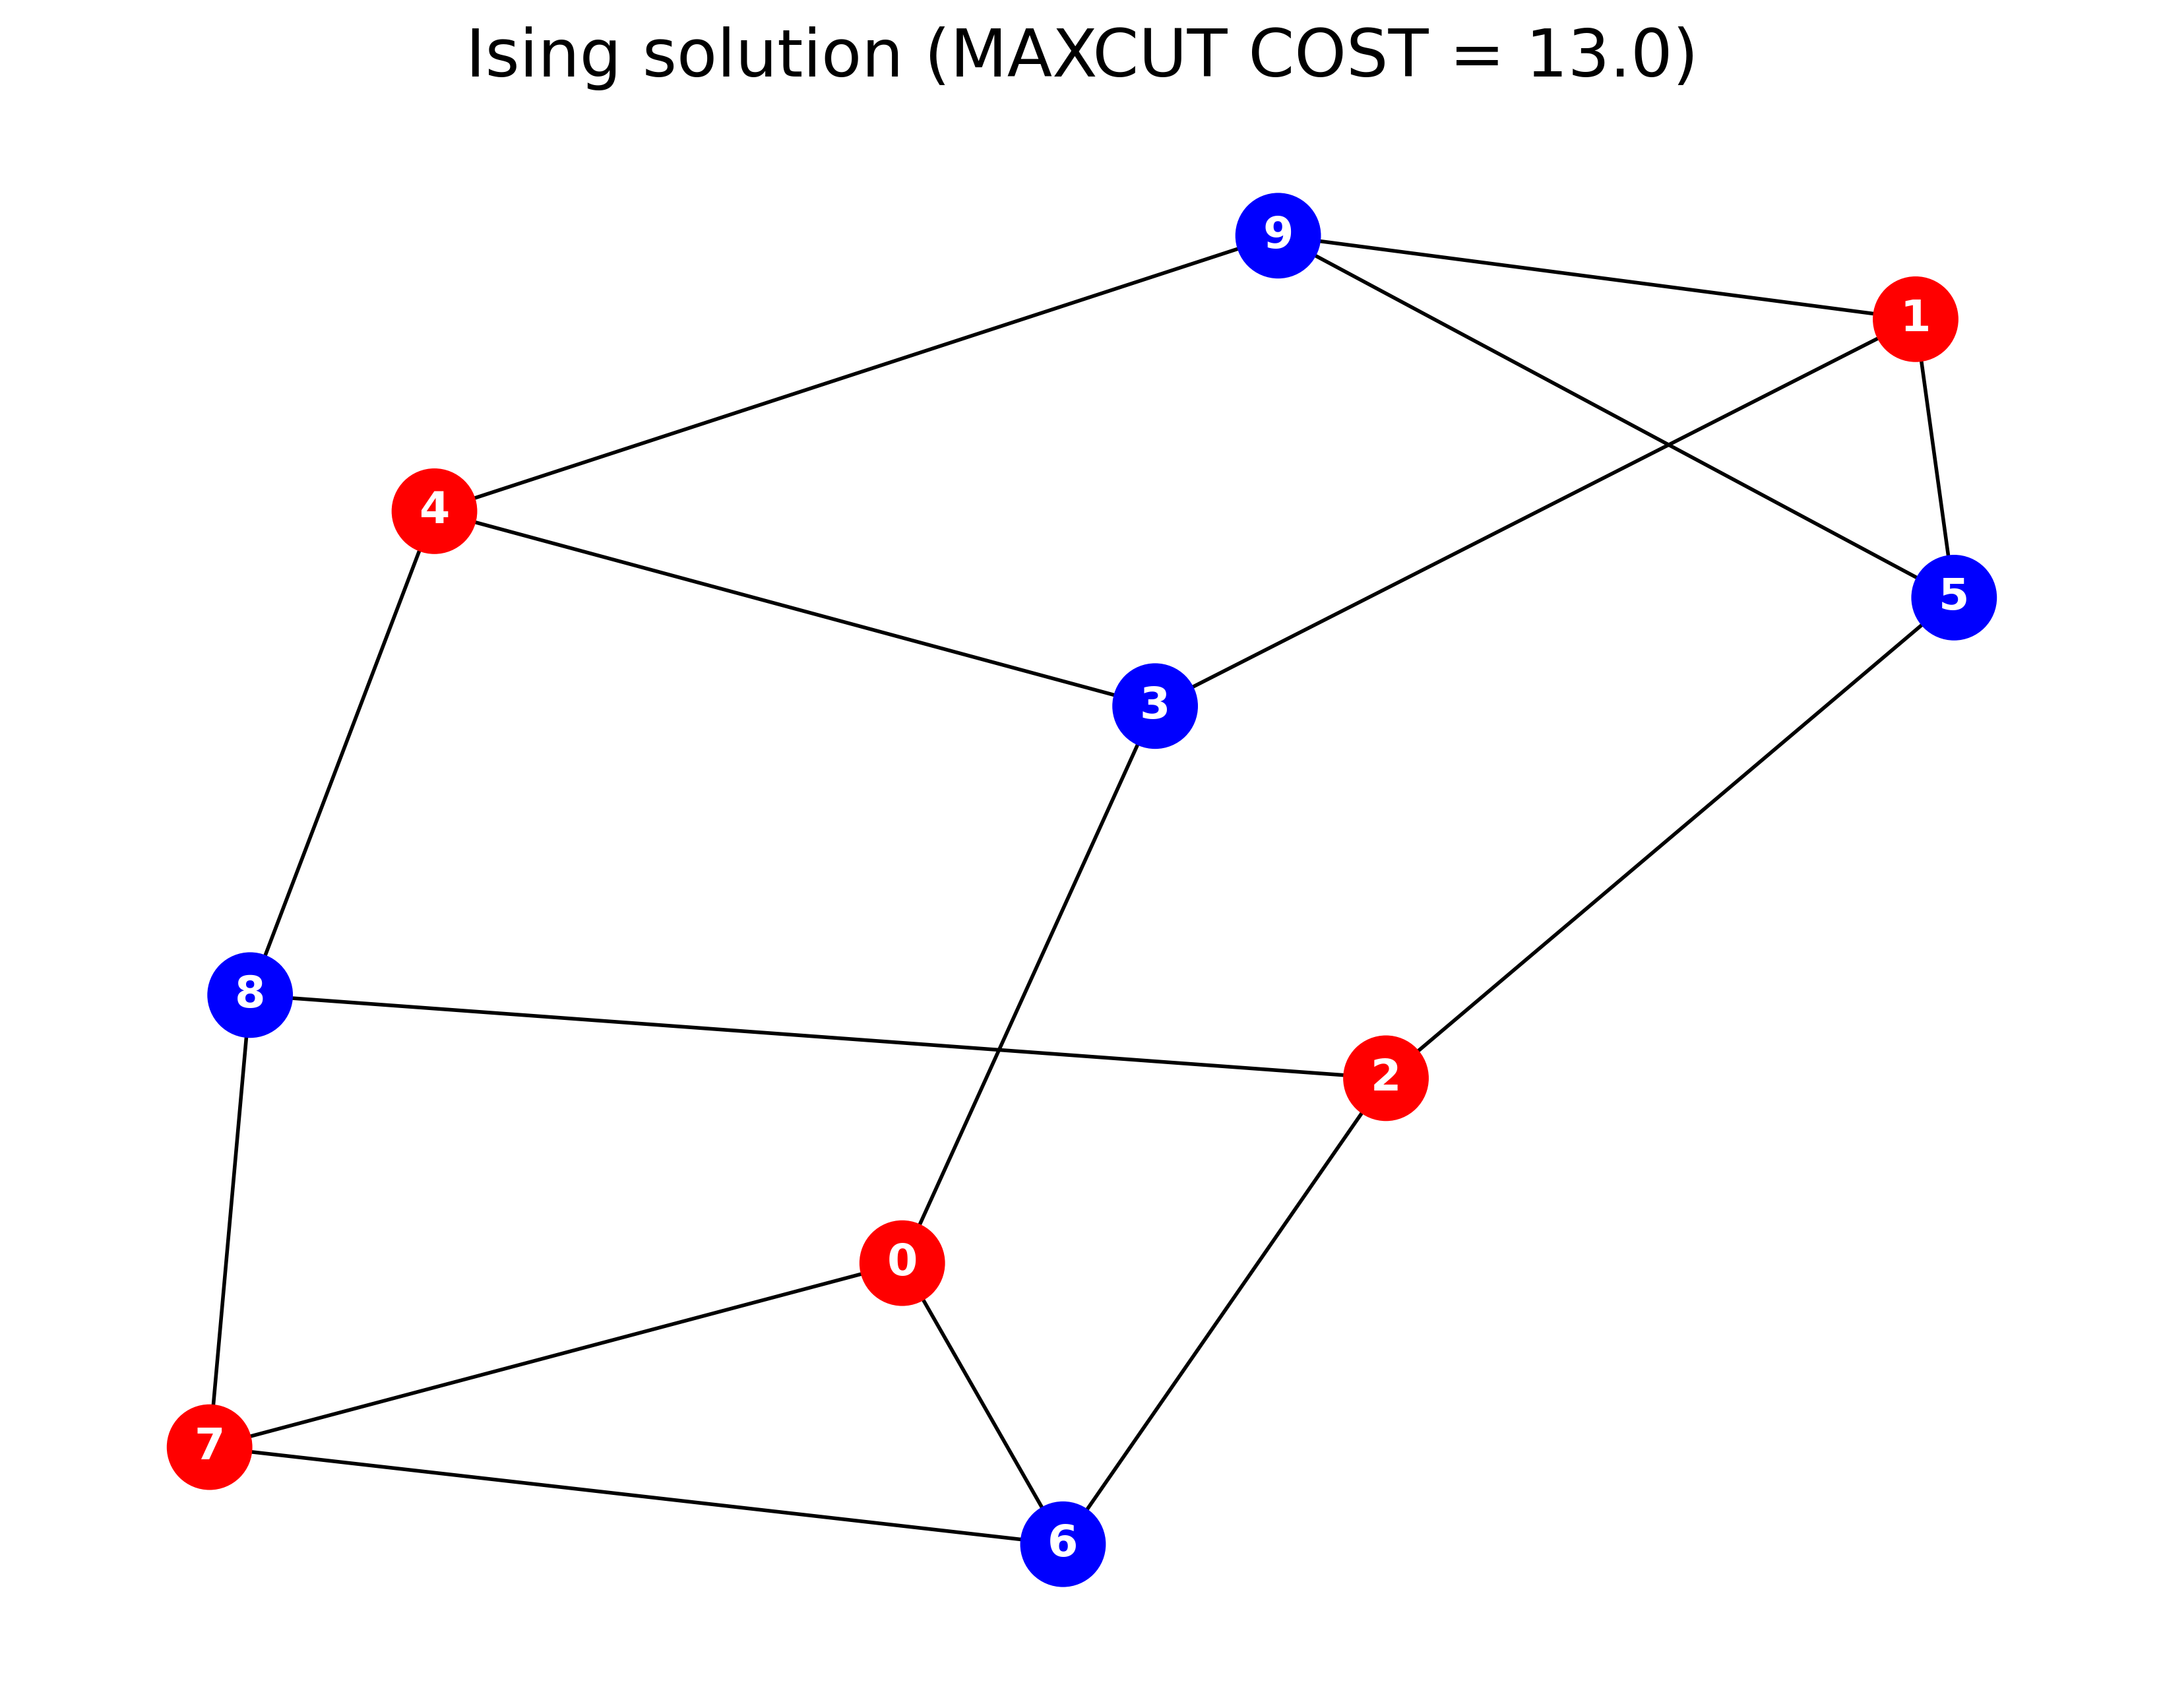

In [26]:
node_list = list(G.nodes())
node_colors_map = dict(zip(node_list, x_ising))

for node, color_val in node_colors_map.items():
    G.nodes[node]['color'] = color_val

color_map_for_drawing = ['red' if node_colors_map[node] == 0 else 'blue' for node in node_list]

plt.figure(figsize=(8, 6), dpi = 400)
pos = nx.spring_layout(G, seed = 42)
nx.draw(G, pos, with_labels=True, node_color=color_map_for_drawing, node_size=500, font_color='white', font_weight='bold')
plt.title(f"Ising solution (MAXCUT COST = {ising_cost})", fontsize = 18)
plt.show()

## Решетка (5 колонок/4 строчки)

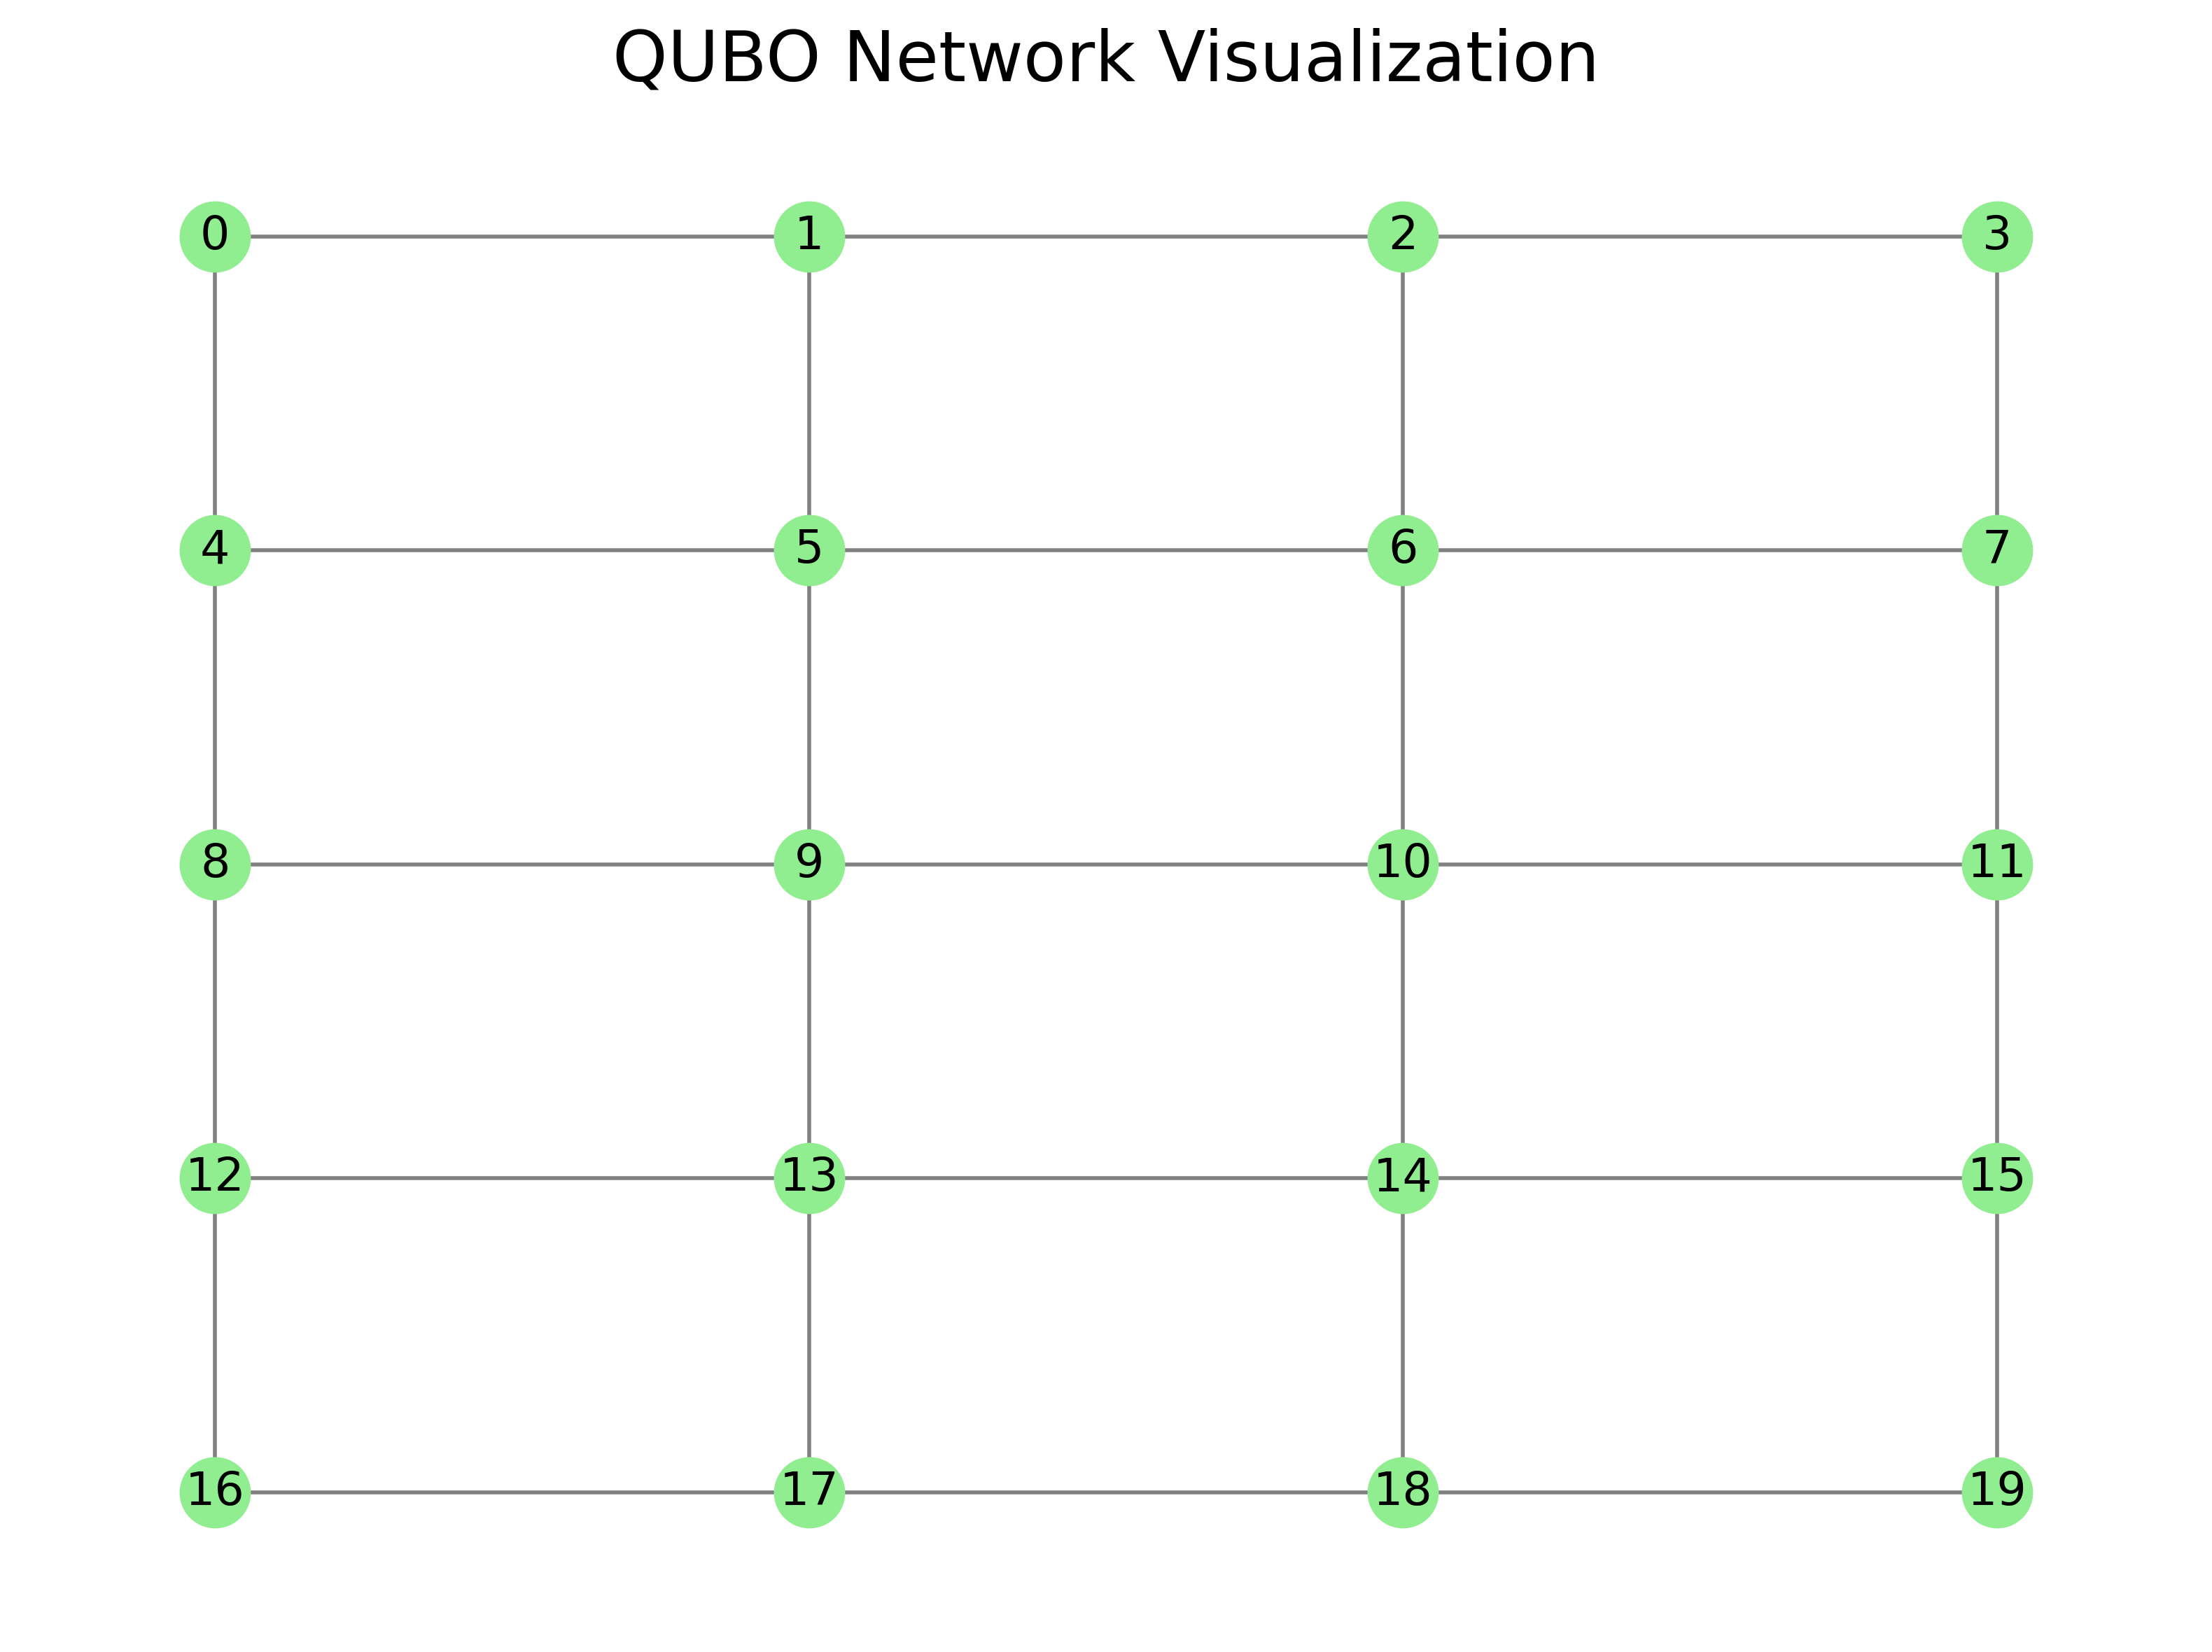

In [27]:
Q, G = generate_grid_qubo(5, 4, vis = True)
G = nx.convert_node_labels_to_integers(G)

In [28]:
def probs2bit_str(probs: np.array) -> str:
    size = int(np.log2(probs.shape[0]))
    bit_s_num = int(np.argmax(probs))
    s = f"{bit_s_num:0{size}b}"
    return s

x_our = solve(Q)
our_cost = x_our @ Q @ x_our

### СТРОИМ ГАМИЛТЬТОНИАН ИЗИНГА ###
H = qubo_to_ising(-Q)

print("Building Hamiltonian of shape:", H.shape)
eigenvals, eigenvecs = sp.linalg.eigsh(H, k=1, which='SR')
energy = eigenvals[0]
gs = eigenvecs[:, 0]
probs = np.abs(gs) ** 2
x_ising = probs2bit_str(probs)
x_ising = list(map(int, list(x_ising)))

ising_cost = x_ising @ Q @ x_ising

Building Hamiltonian of shape: (1048576, 1048576)


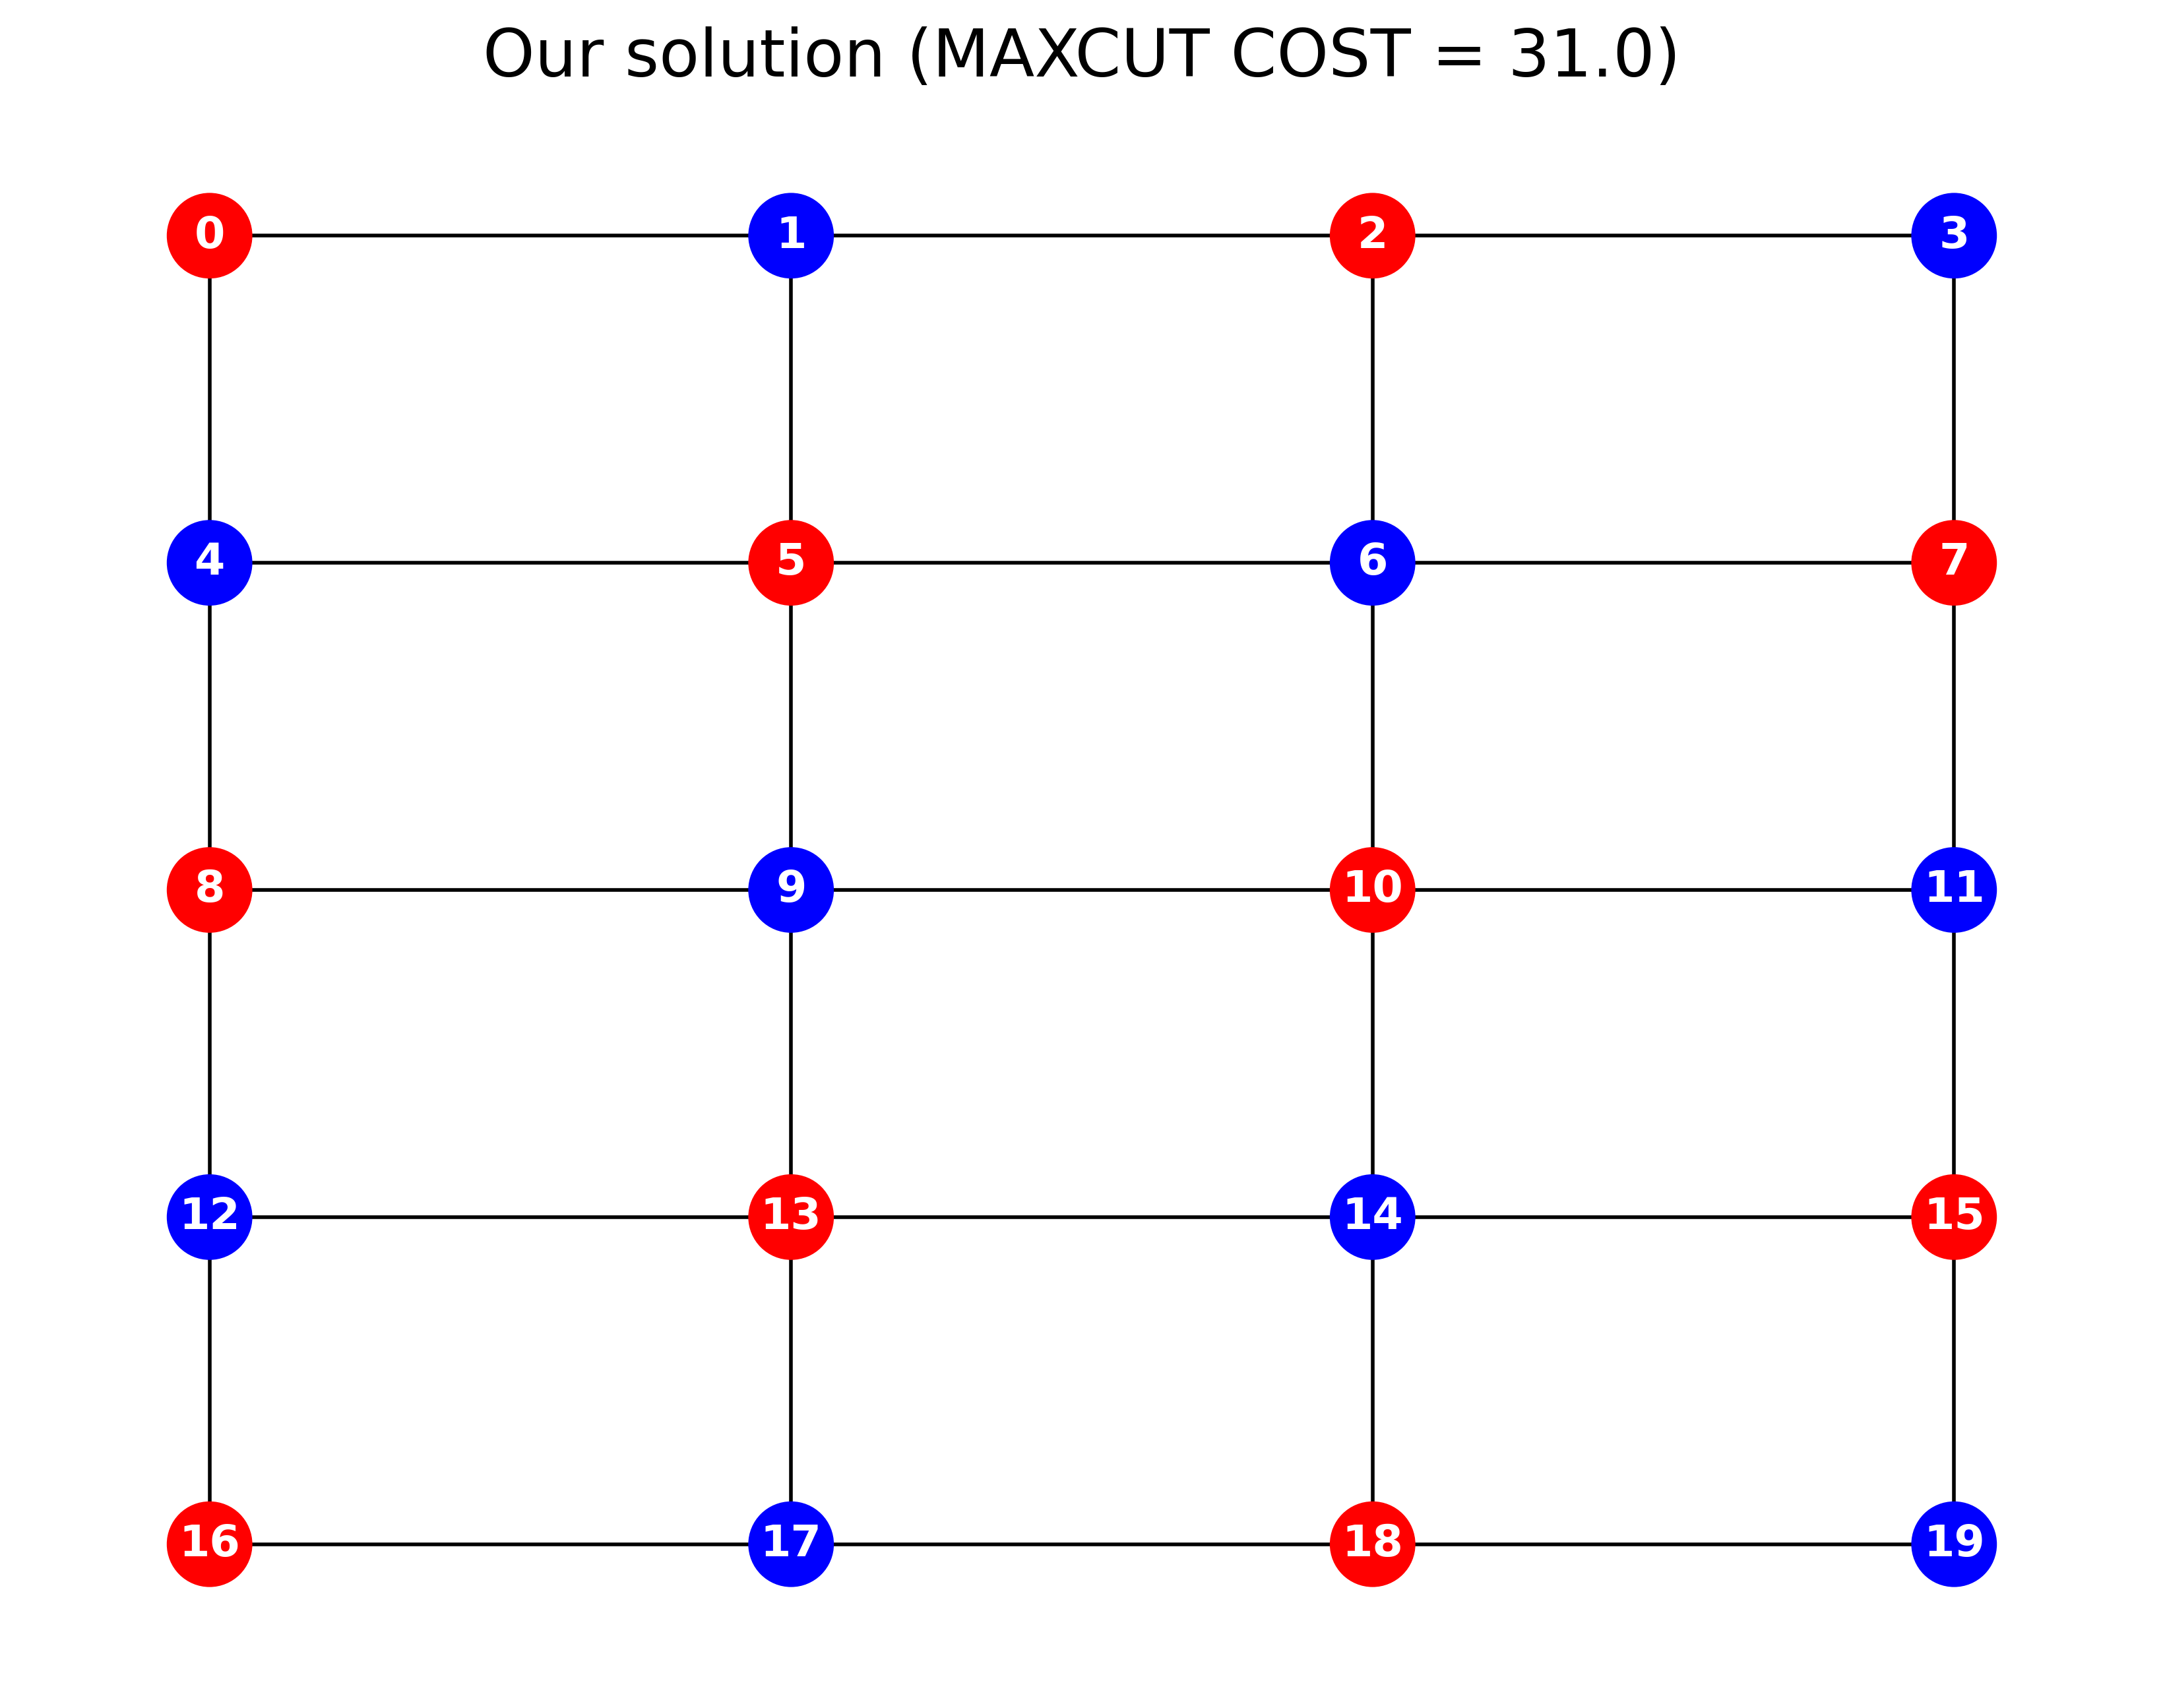

In [29]:
node_list = list(G.nodes())
node_colors_map = dict(zip(node_list, x_our))

for node, color_val in node_colors_map.items():
    G.nodes[node]['color'] = color_val

color_map_for_drawing = ['red' if node_colors_map[node] == 0 else 'blue' for node in node_list]

plt.figure(figsize=(8, 6), dpi = 400)
pos = {}
temp = 0
for row in range(5):
    for col in range(4):
        pos[temp] = (col, -row)
        temp += 1

nx.draw(G, pos, with_labels=True, node_color=color_map_for_drawing, node_size=500, font_color='white', font_weight='bold')
plt.title(f"Our solution (MAXCUT COST = {our_cost})", fontsize = 18)
plt.show()

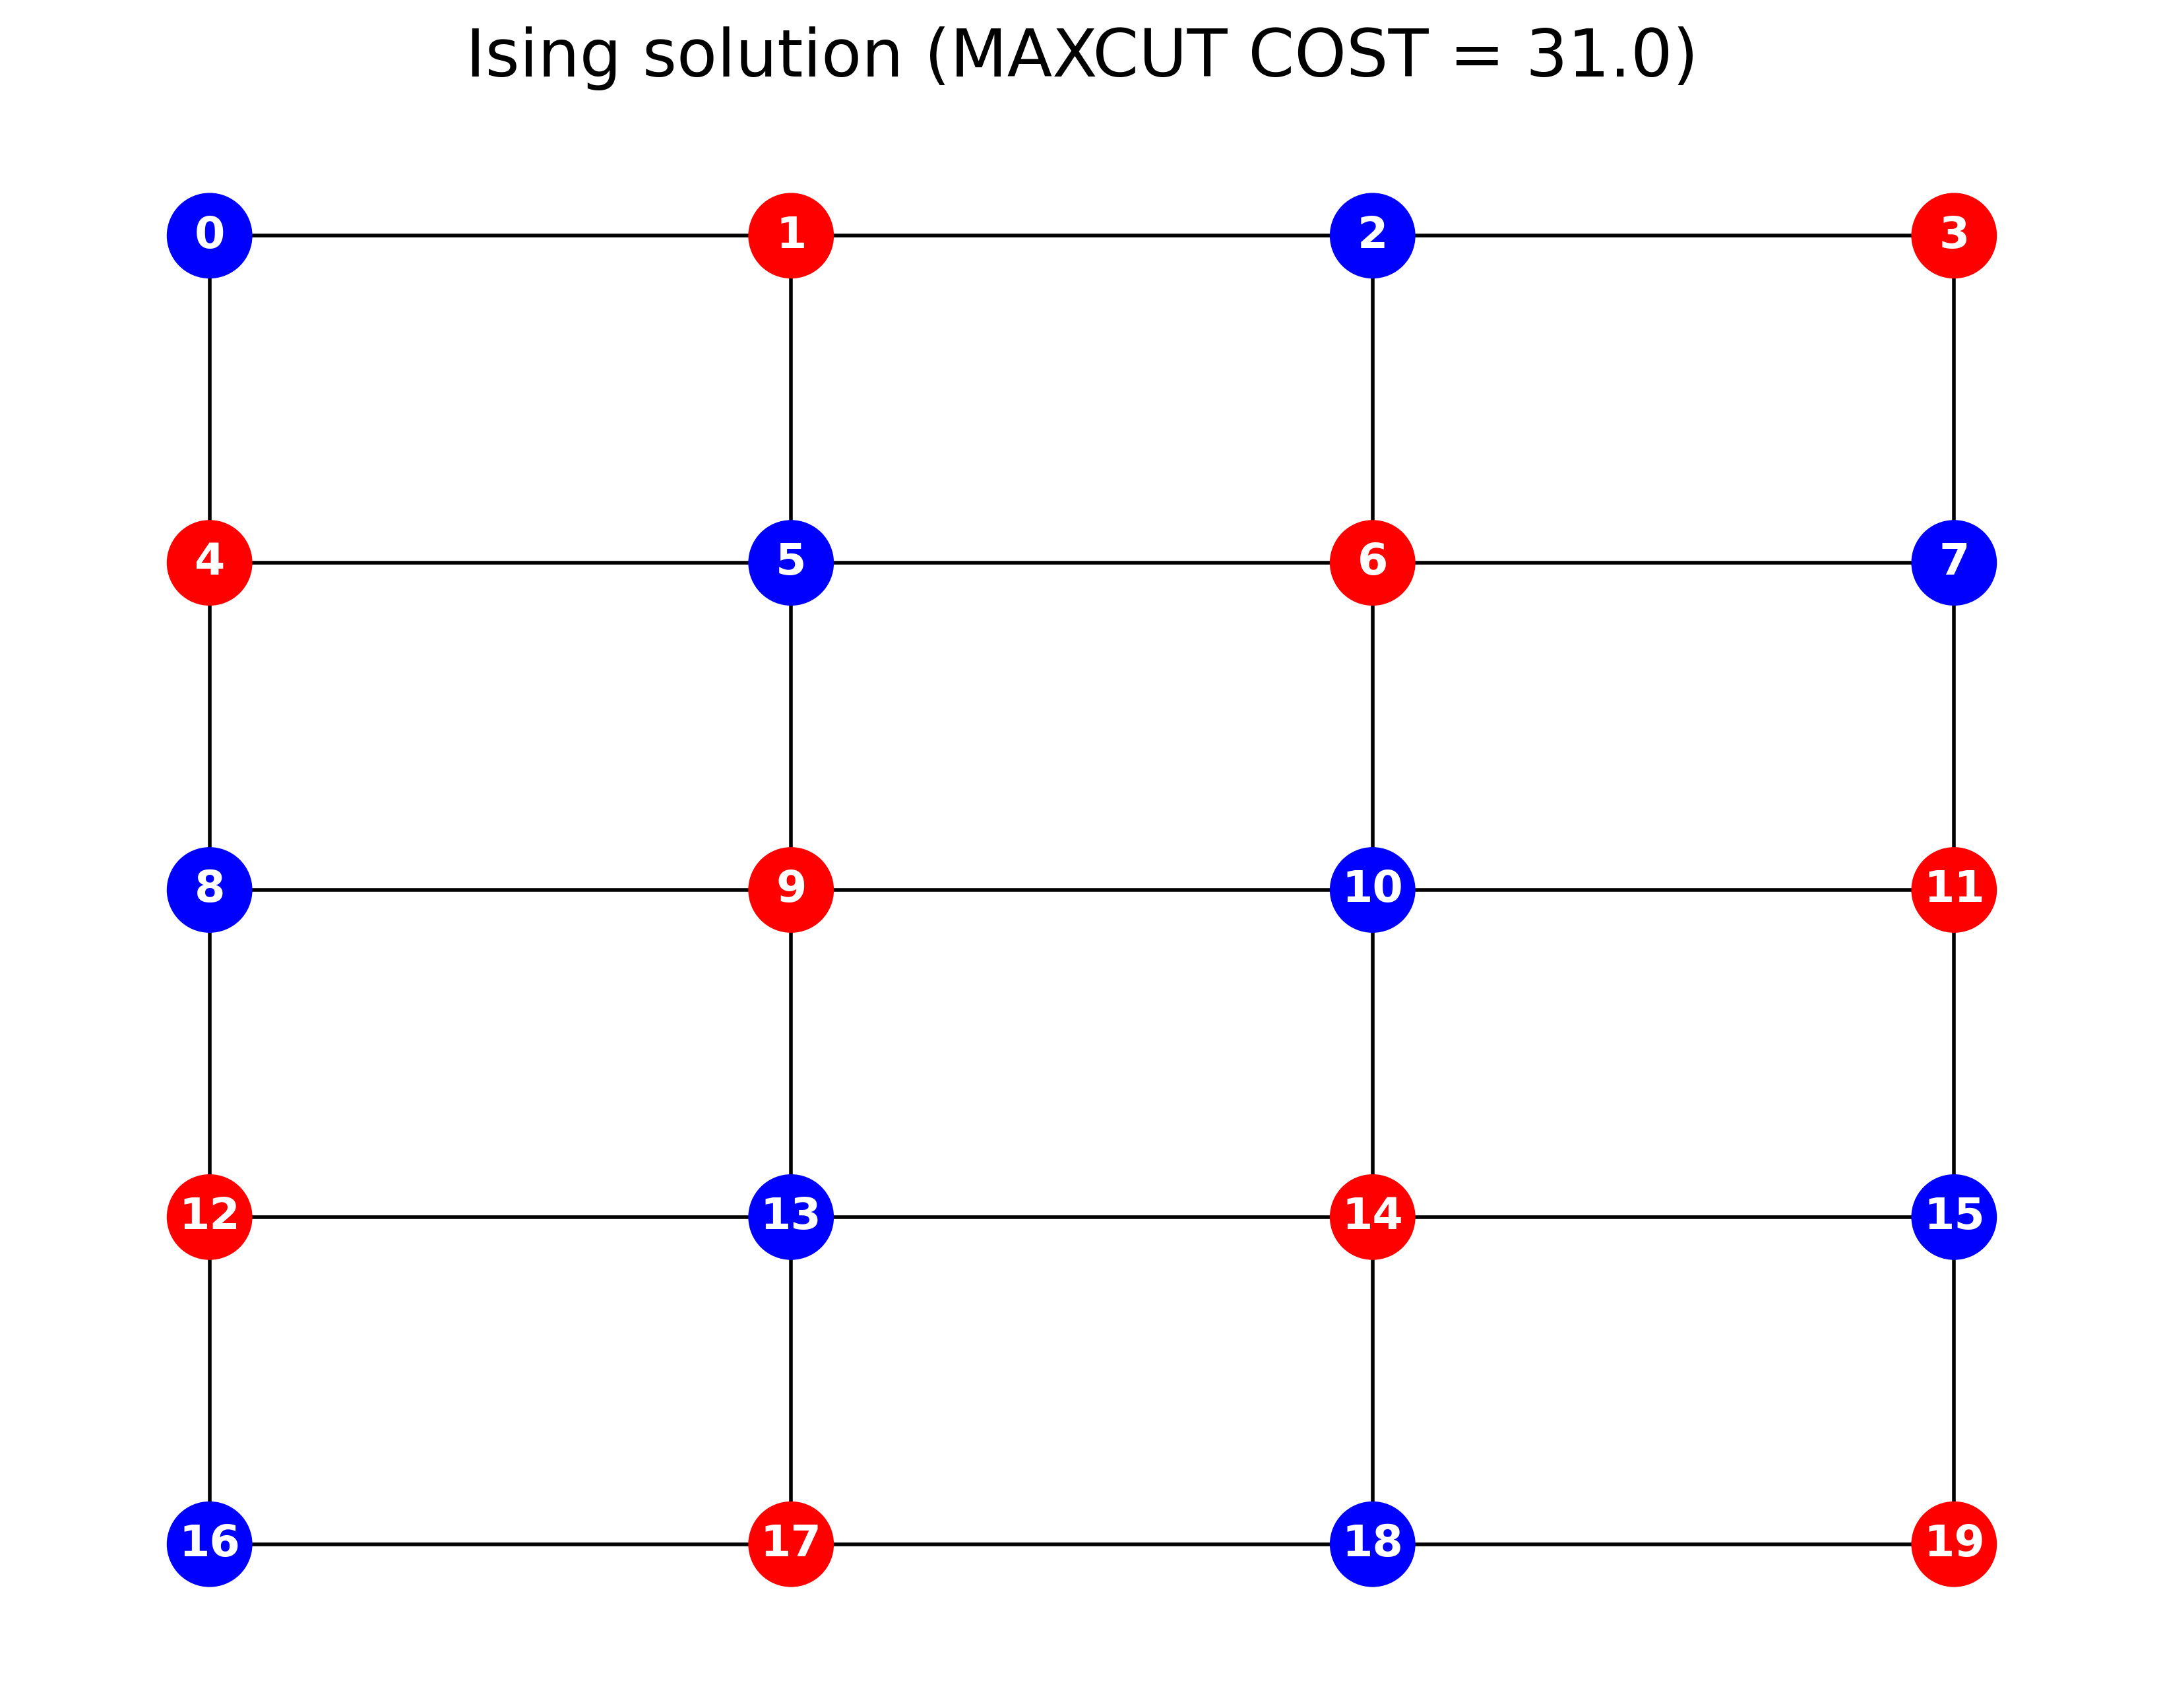

In [30]:
node_list = list(G.nodes())
node_colors_map = dict(zip(node_list, x_ising))

for node, color_val in node_colors_map.items():
    G.nodes[node]['color'] = color_val

color_map_for_drawing = ['red' if node_colors_map[node] == 1 else 'blue' for node in node_list]


plt.figure(figsize=(8, 6), dpi = 400)
pos = {}
temp = 0
for row in range(5):
    for col in range(4):
        pos[temp] = (col, -row)
        temp += 1

nx.draw(G, pos, with_labels=True, node_color=color_map_for_drawing, node_size=500, font_color='white', font_weight='bold')
plt.title(f"Ising solution (MAXCUT COST = {ising_cost})", fontsize = 18)
plt.show()

## Полносвязный граф (12 вершин)

In [31]:
Q, G = generate_complete_graph_qubo(12, vis = True)

In [32]:
def probs2bit_str(probs: np.array) -> str:
    size = int(np.log2(probs.shape[0]))
    bit_s_num = int(np.argmax(probs))
    s = f"{bit_s_num:0{size}b}"
    return s

x_our = solve(Q) #наше решение
our_cost = x_our @ Q @ x_our

### СТРОИМ ГАМИЛТЬТОНИАН ИЗИНГА ###
H = qubo_to_ising(-Q)

print("Building Hamiltonian of shape:", H.shape)
eigenvals, eigenvecs = sp.linalg.eigsh(H, k=1, which='SR')
energy = eigenvals[0]
gs = eigenvecs[:, 0]
probs = np.abs(gs) ** 2
x_ising = probs2bit_str(probs)
x_ising = list(map(int, list(x_ising)))

ising_cost = x_ising @ Q @ x_ising

Building Hamiltonian of shape: (4096, 4096)


In [33]:
ising_cost, our_cost

(36.0, 32.0)

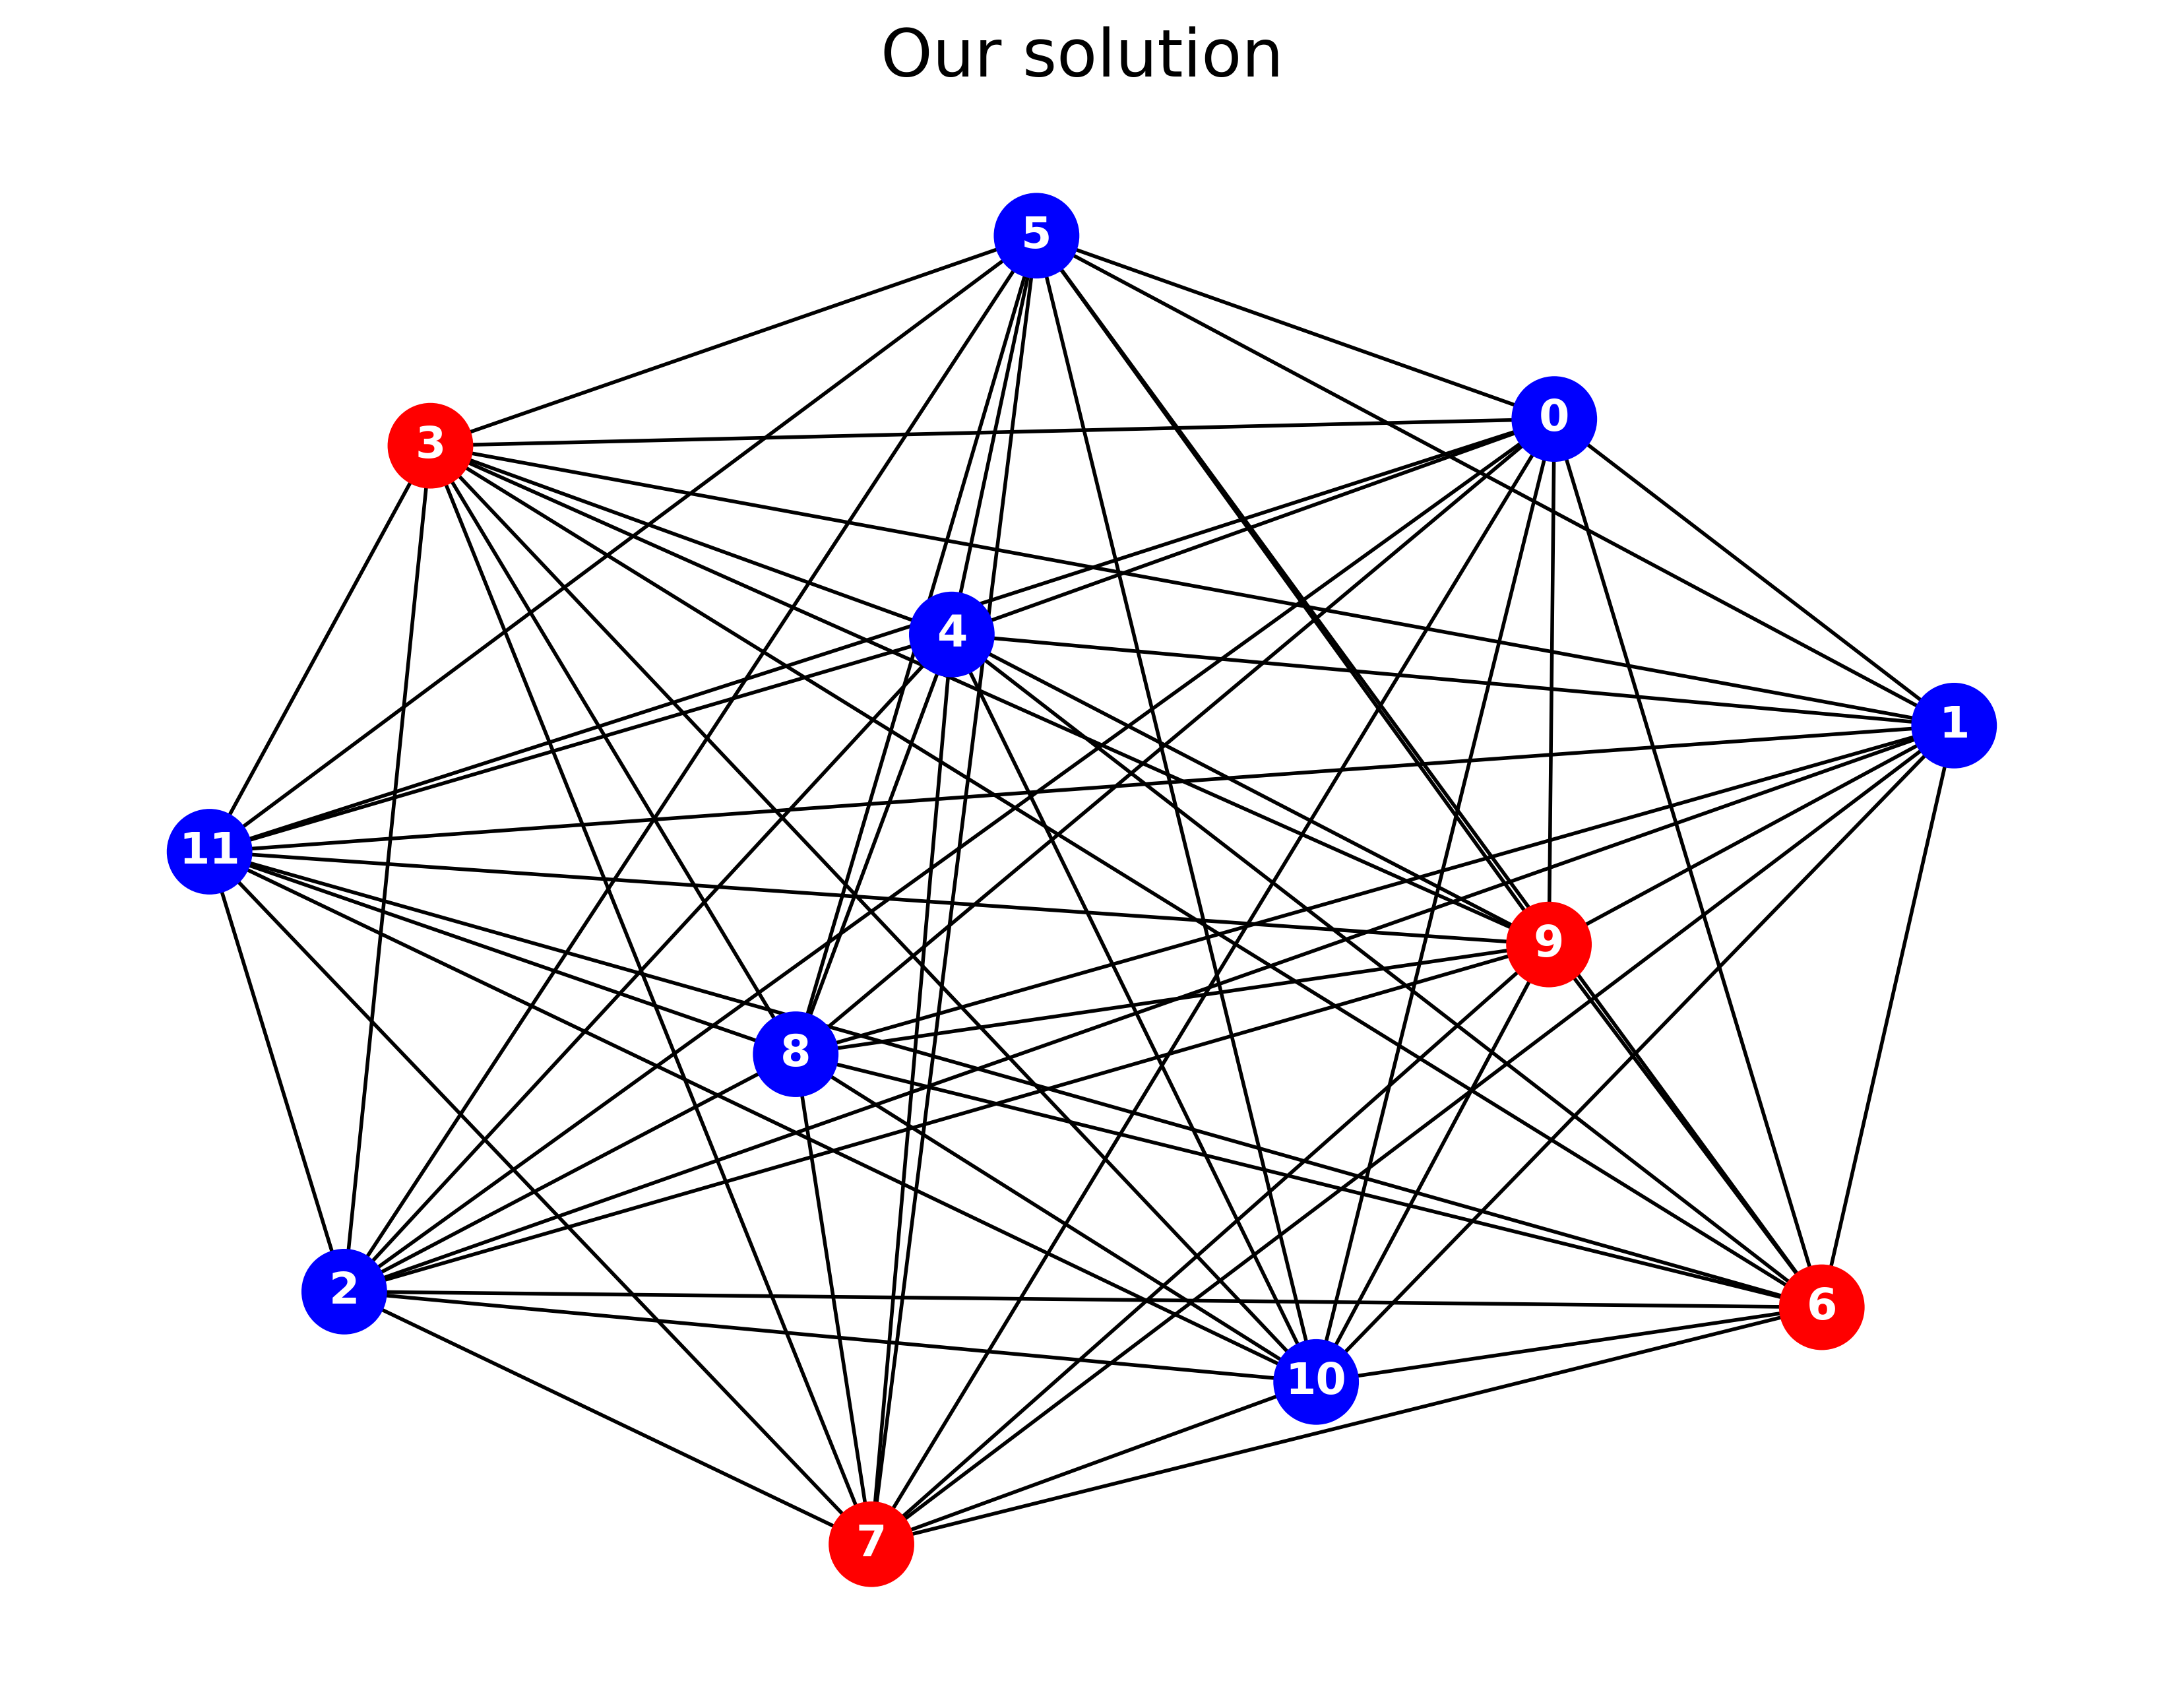

In [34]:
node_list = list(G.nodes())
node_colors_map = dict(zip(node_list, x_our))

for node, color_val in node_colors_map.items():
    G.nodes[node]['color'] = color_val


color_map_for_drawing = ['red' if node_colors_map[node] == 0 else 'blue' for node in node_list]

plt.figure(figsize=(8, 6), dpi = 400)
pos = nx.spring_layout(G, seed = 42)  # или другой layout, например, nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color=color_map_for_drawing, node_size=500, font_color='white', font_weight='bold')
plt.title("Our solution", fontsize = 18)
plt.show()

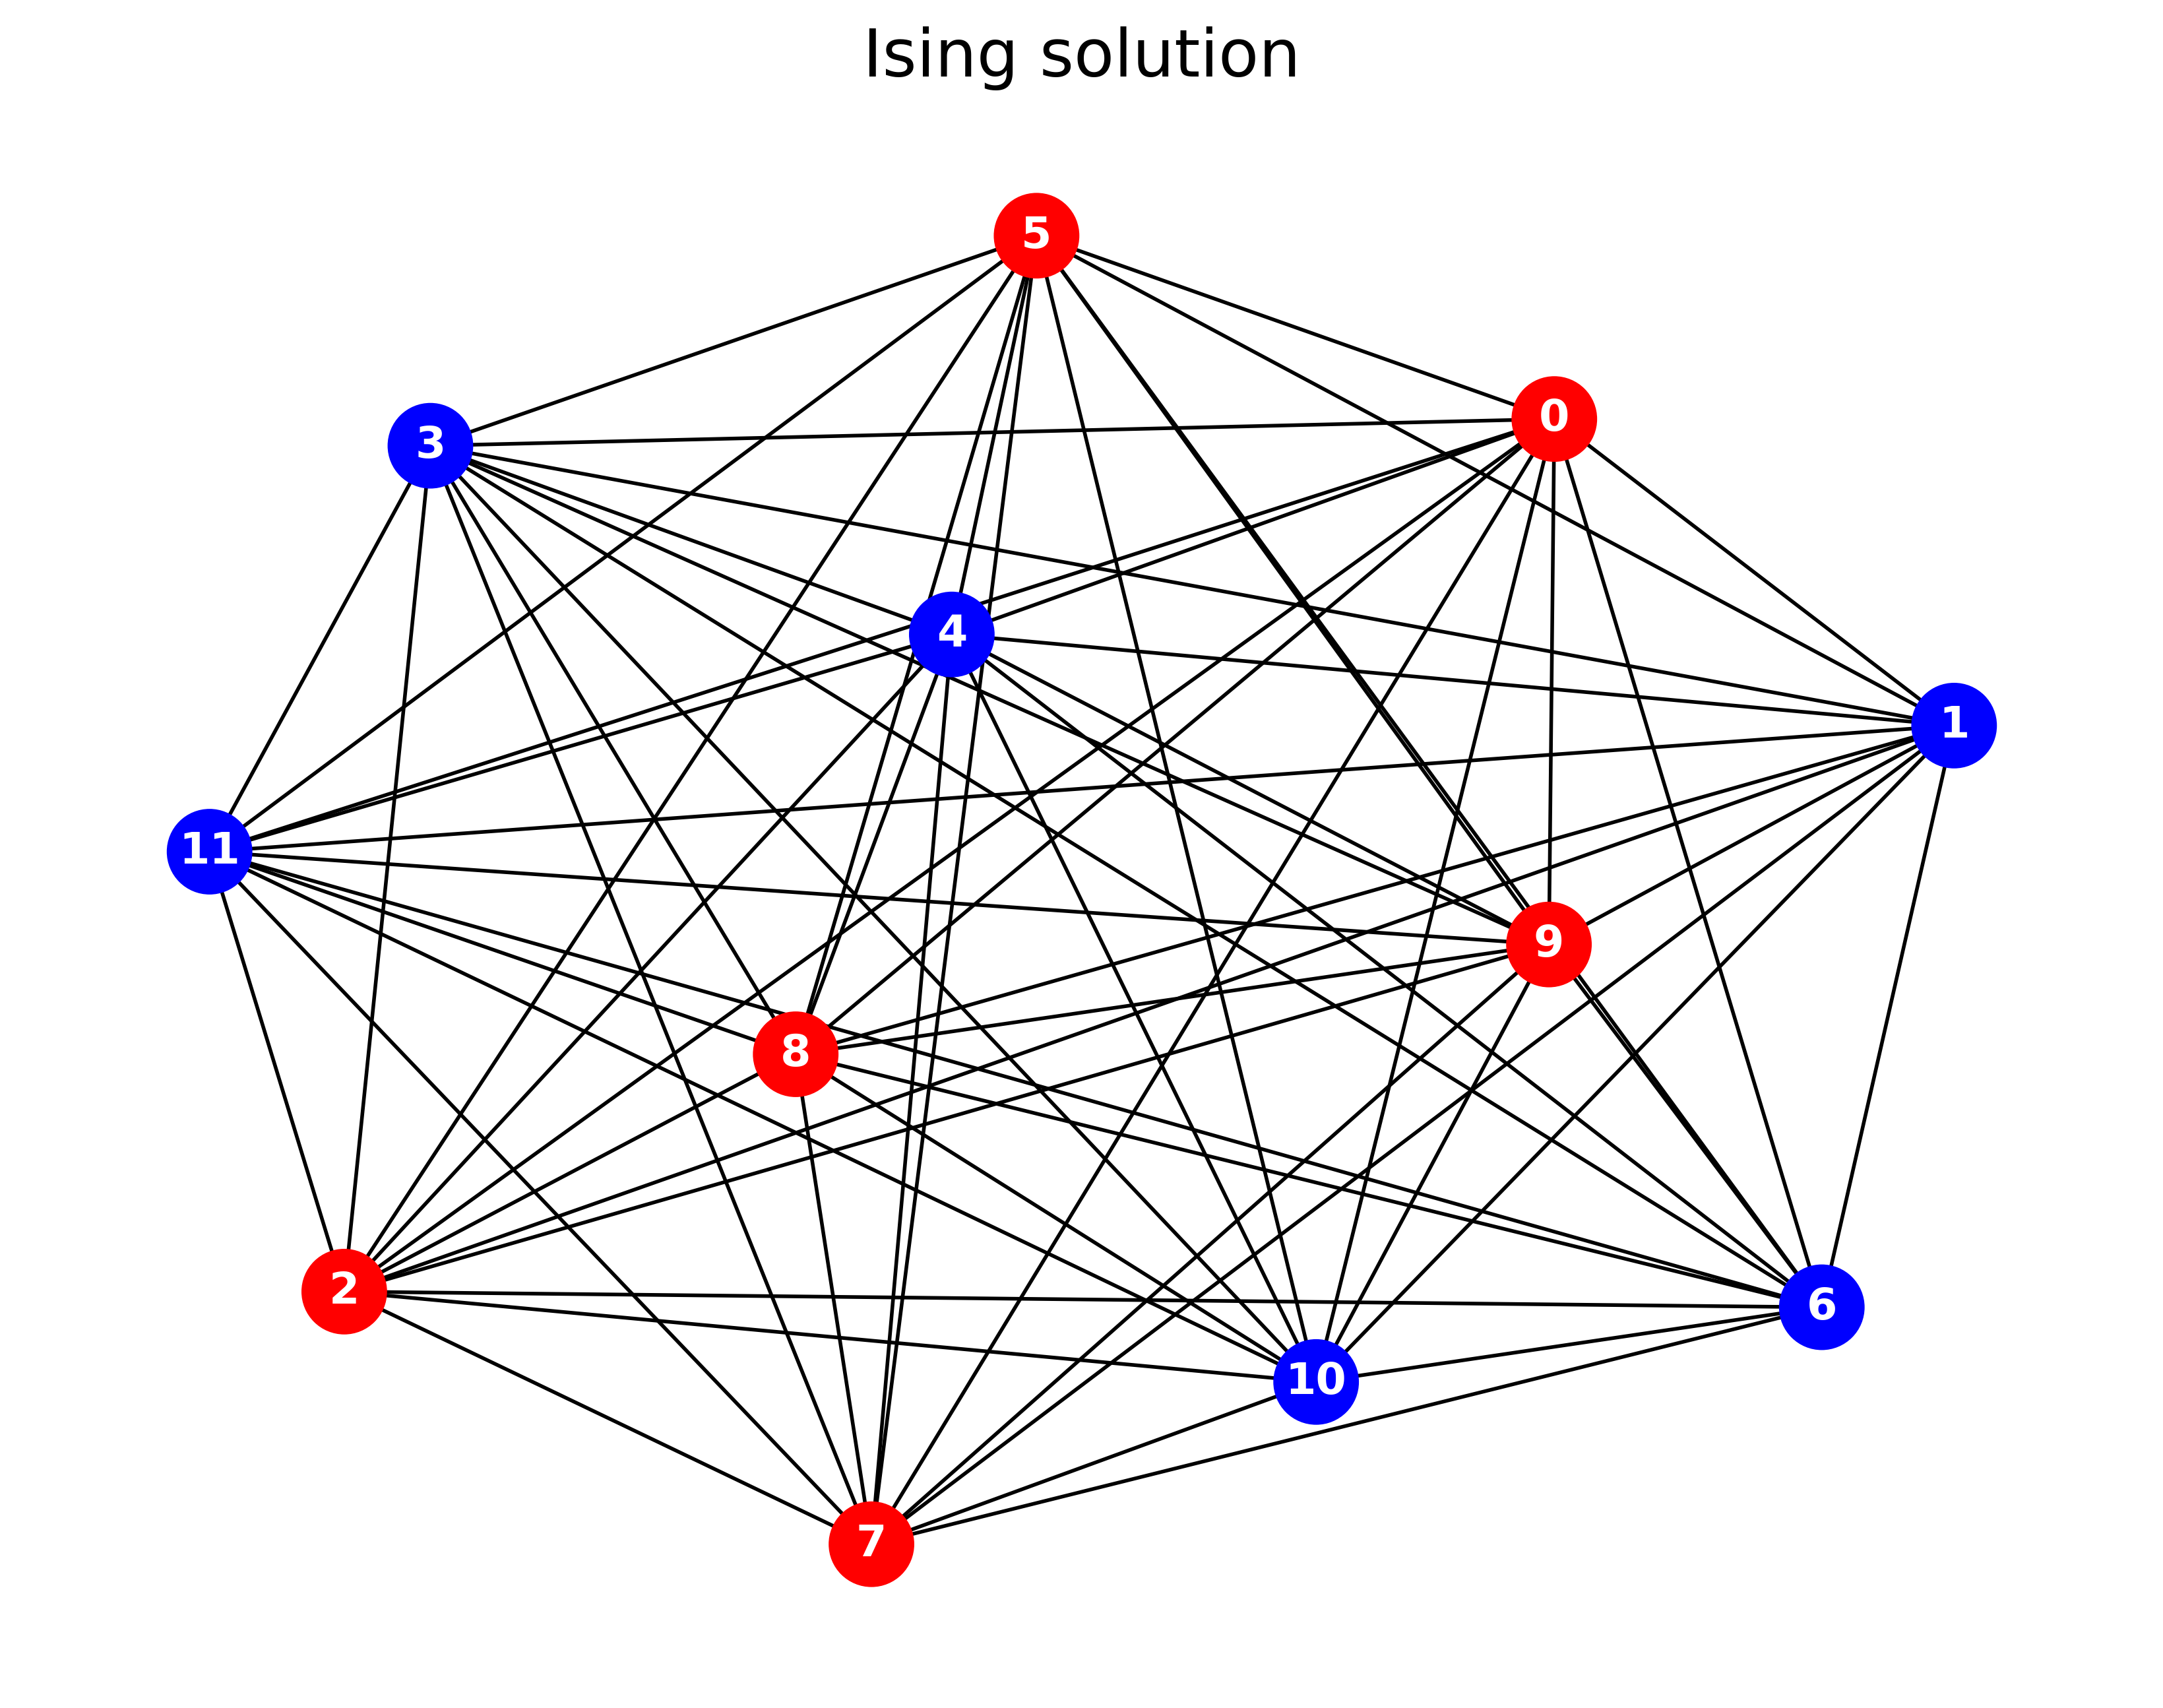

In [35]:
# Сопоставление узлов и цветов
node_list = list(G.nodes())
node_colors_map = dict(zip(node_list, x_ising))

for node, color_val in node_colors_map.items():
    G.nodes[node]['color'] = color_val

color_map_for_drawing = ['red' if node_colors_map[node] == 1 else 'blue' for node in node_list]


plt.figure(figsize=(8, 6), dpi=400)
pos = nx.spring_layout(G, seed = 42)
nx.draw(G, pos, with_labels=True, node_color=color_map_for_drawing, node_size=500, font_color='white', font_weight='bold')
plt.title("Ising solution", fontsize = 18)
plt.show()

## Двудольный граф 

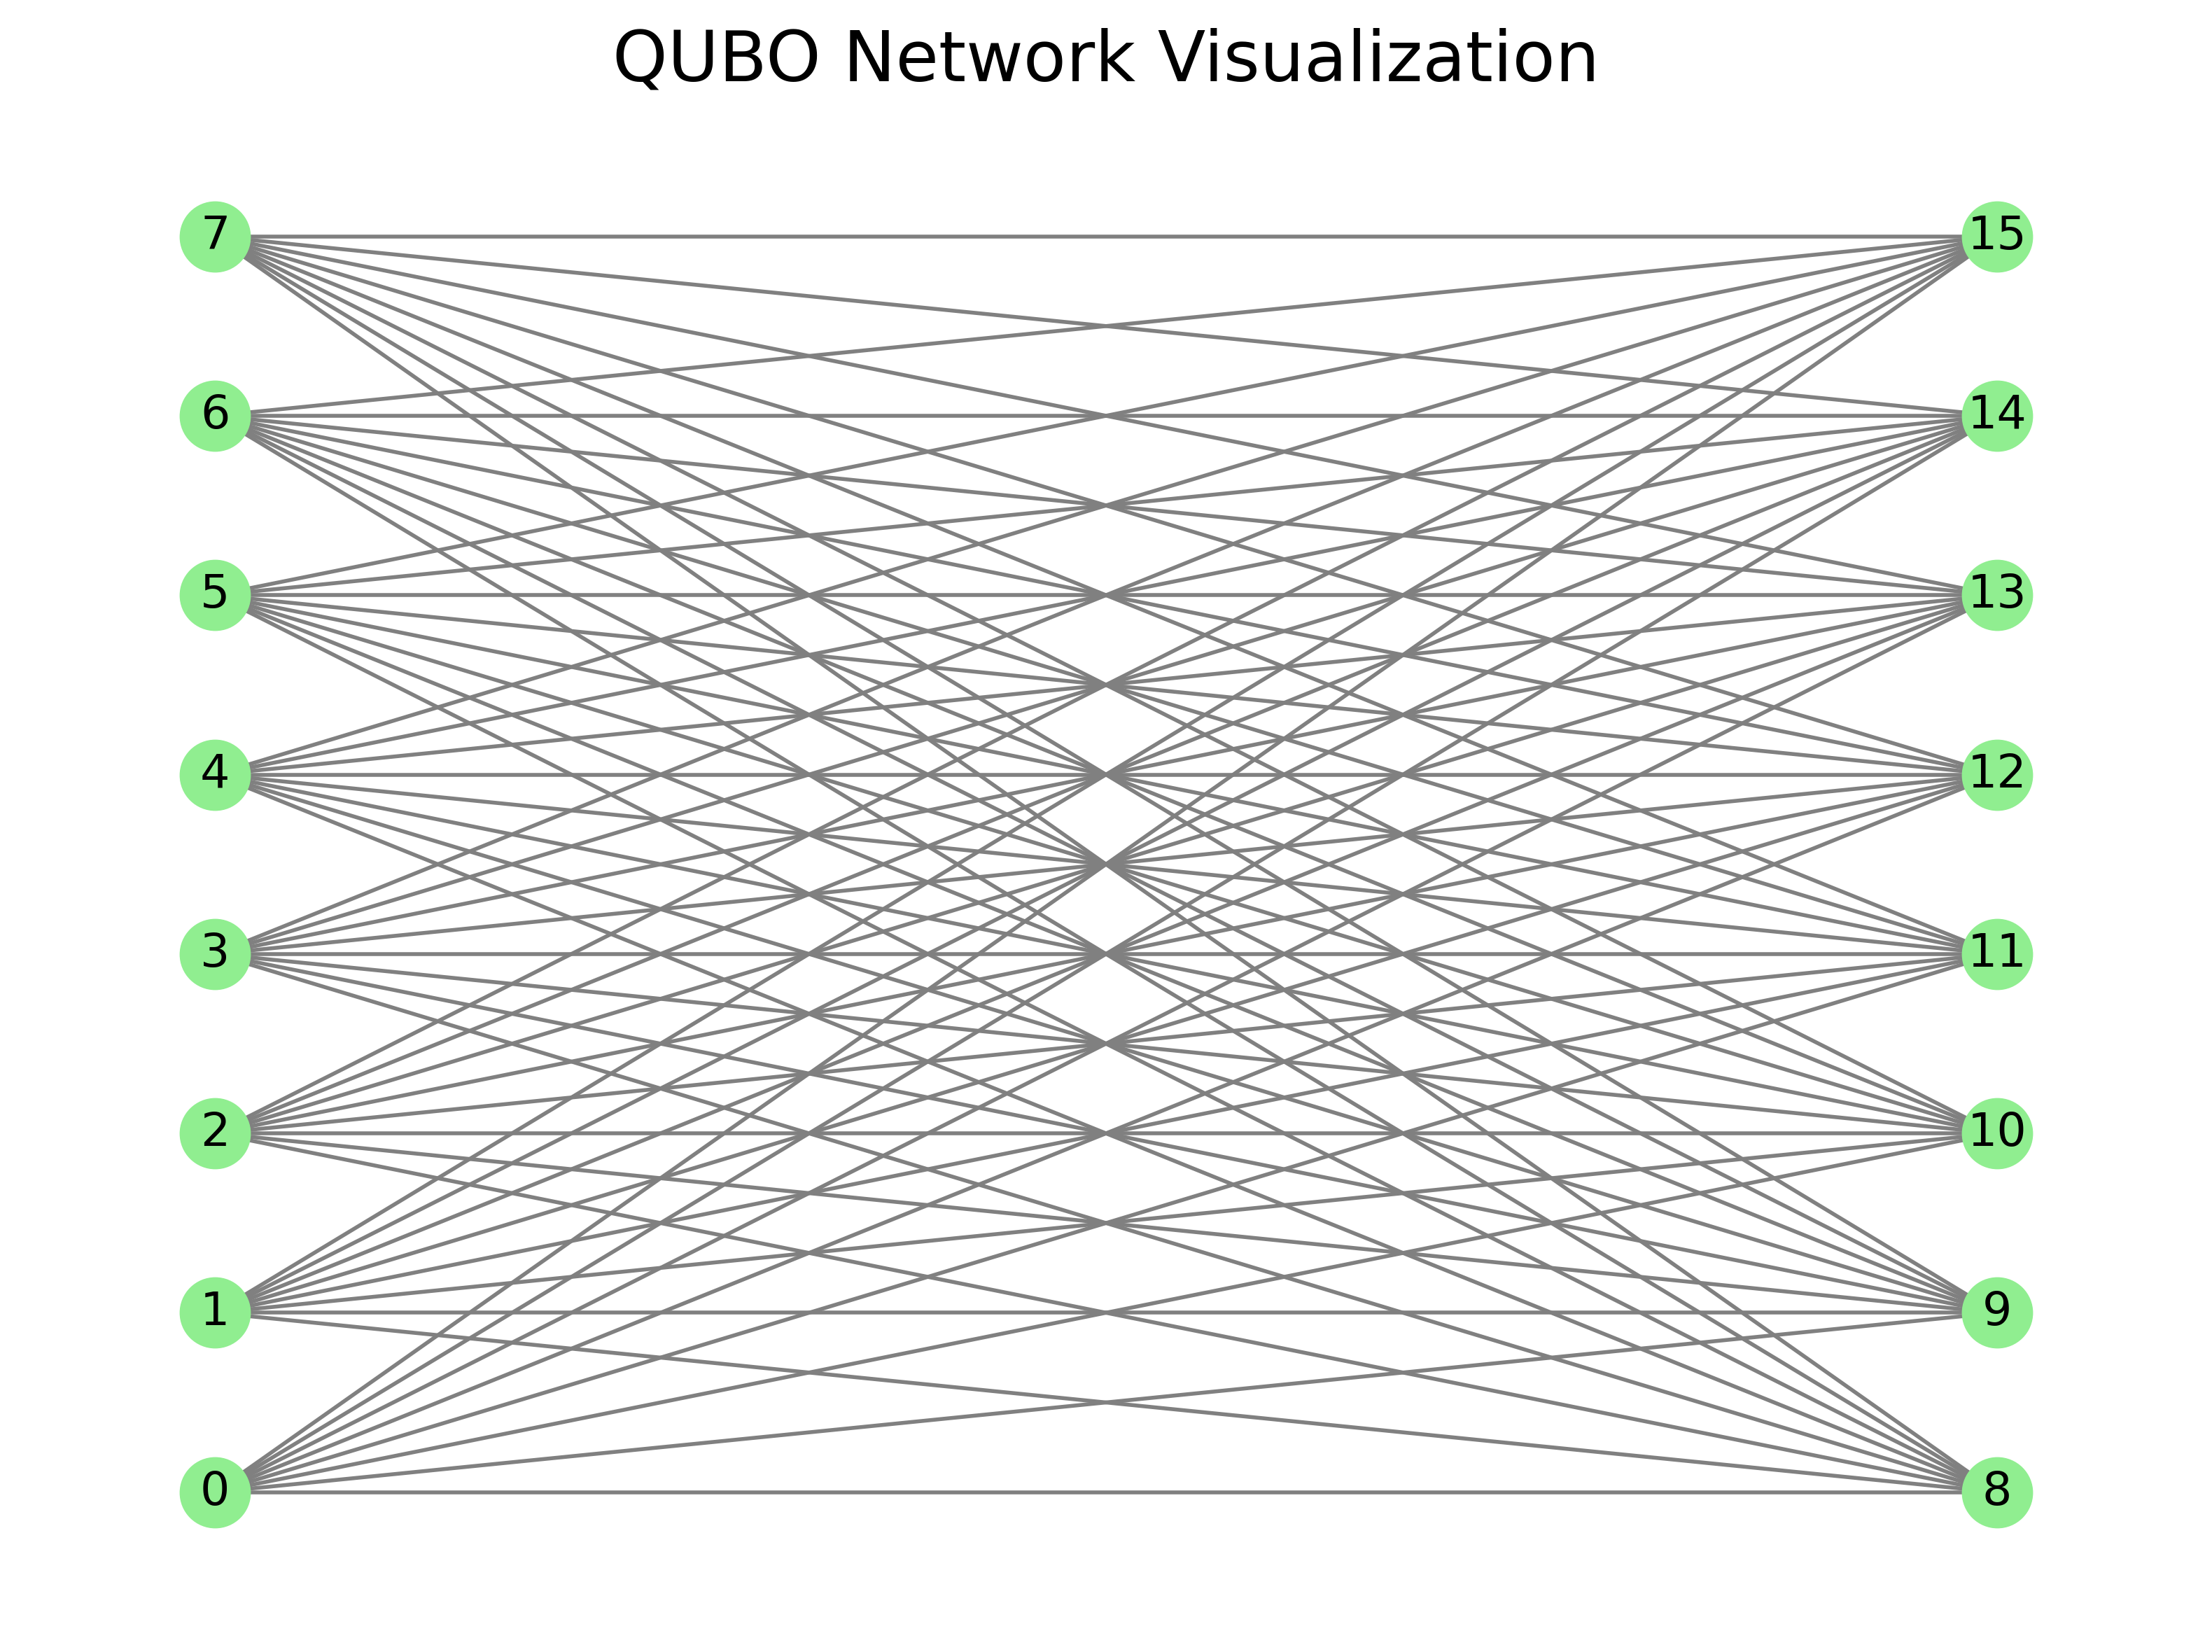

In [36]:
Q, G = complete_bipartite_graph_k_nn(8, vis=True)

In [37]:
def probs2bit_str(probs: np.array) -> str:
    size = int(np.log2(probs.shape[0]))
    bit_s_num = int(np.argmax(probs))
    s = f"{bit_s_num:0{size}b}"
    return s

x_our = solve(Q) #наше решение
our_cost = x_our @ Q @ x_our

### СТРОИМ ГАМИЛТЬТОНИАН ИЗИНГА ###
H = qubo_to_ising(-Q)

print("Building Hamiltonian of shape:", H.shape)
eigenvals, eigenvecs = sp.linalg.eigsh(H, k=1, which='SR')
energy = eigenvals[0]
gs = eigenvecs[:, 0]
probs = np.abs(gs) ** 2
x_ising = probs2bit_str(probs)
x_ising = list(map(int, list(x_ising)))

ising_cost = x_ising @ Q @ x_ising

Building Hamiltonian of shape: (65536, 65536)


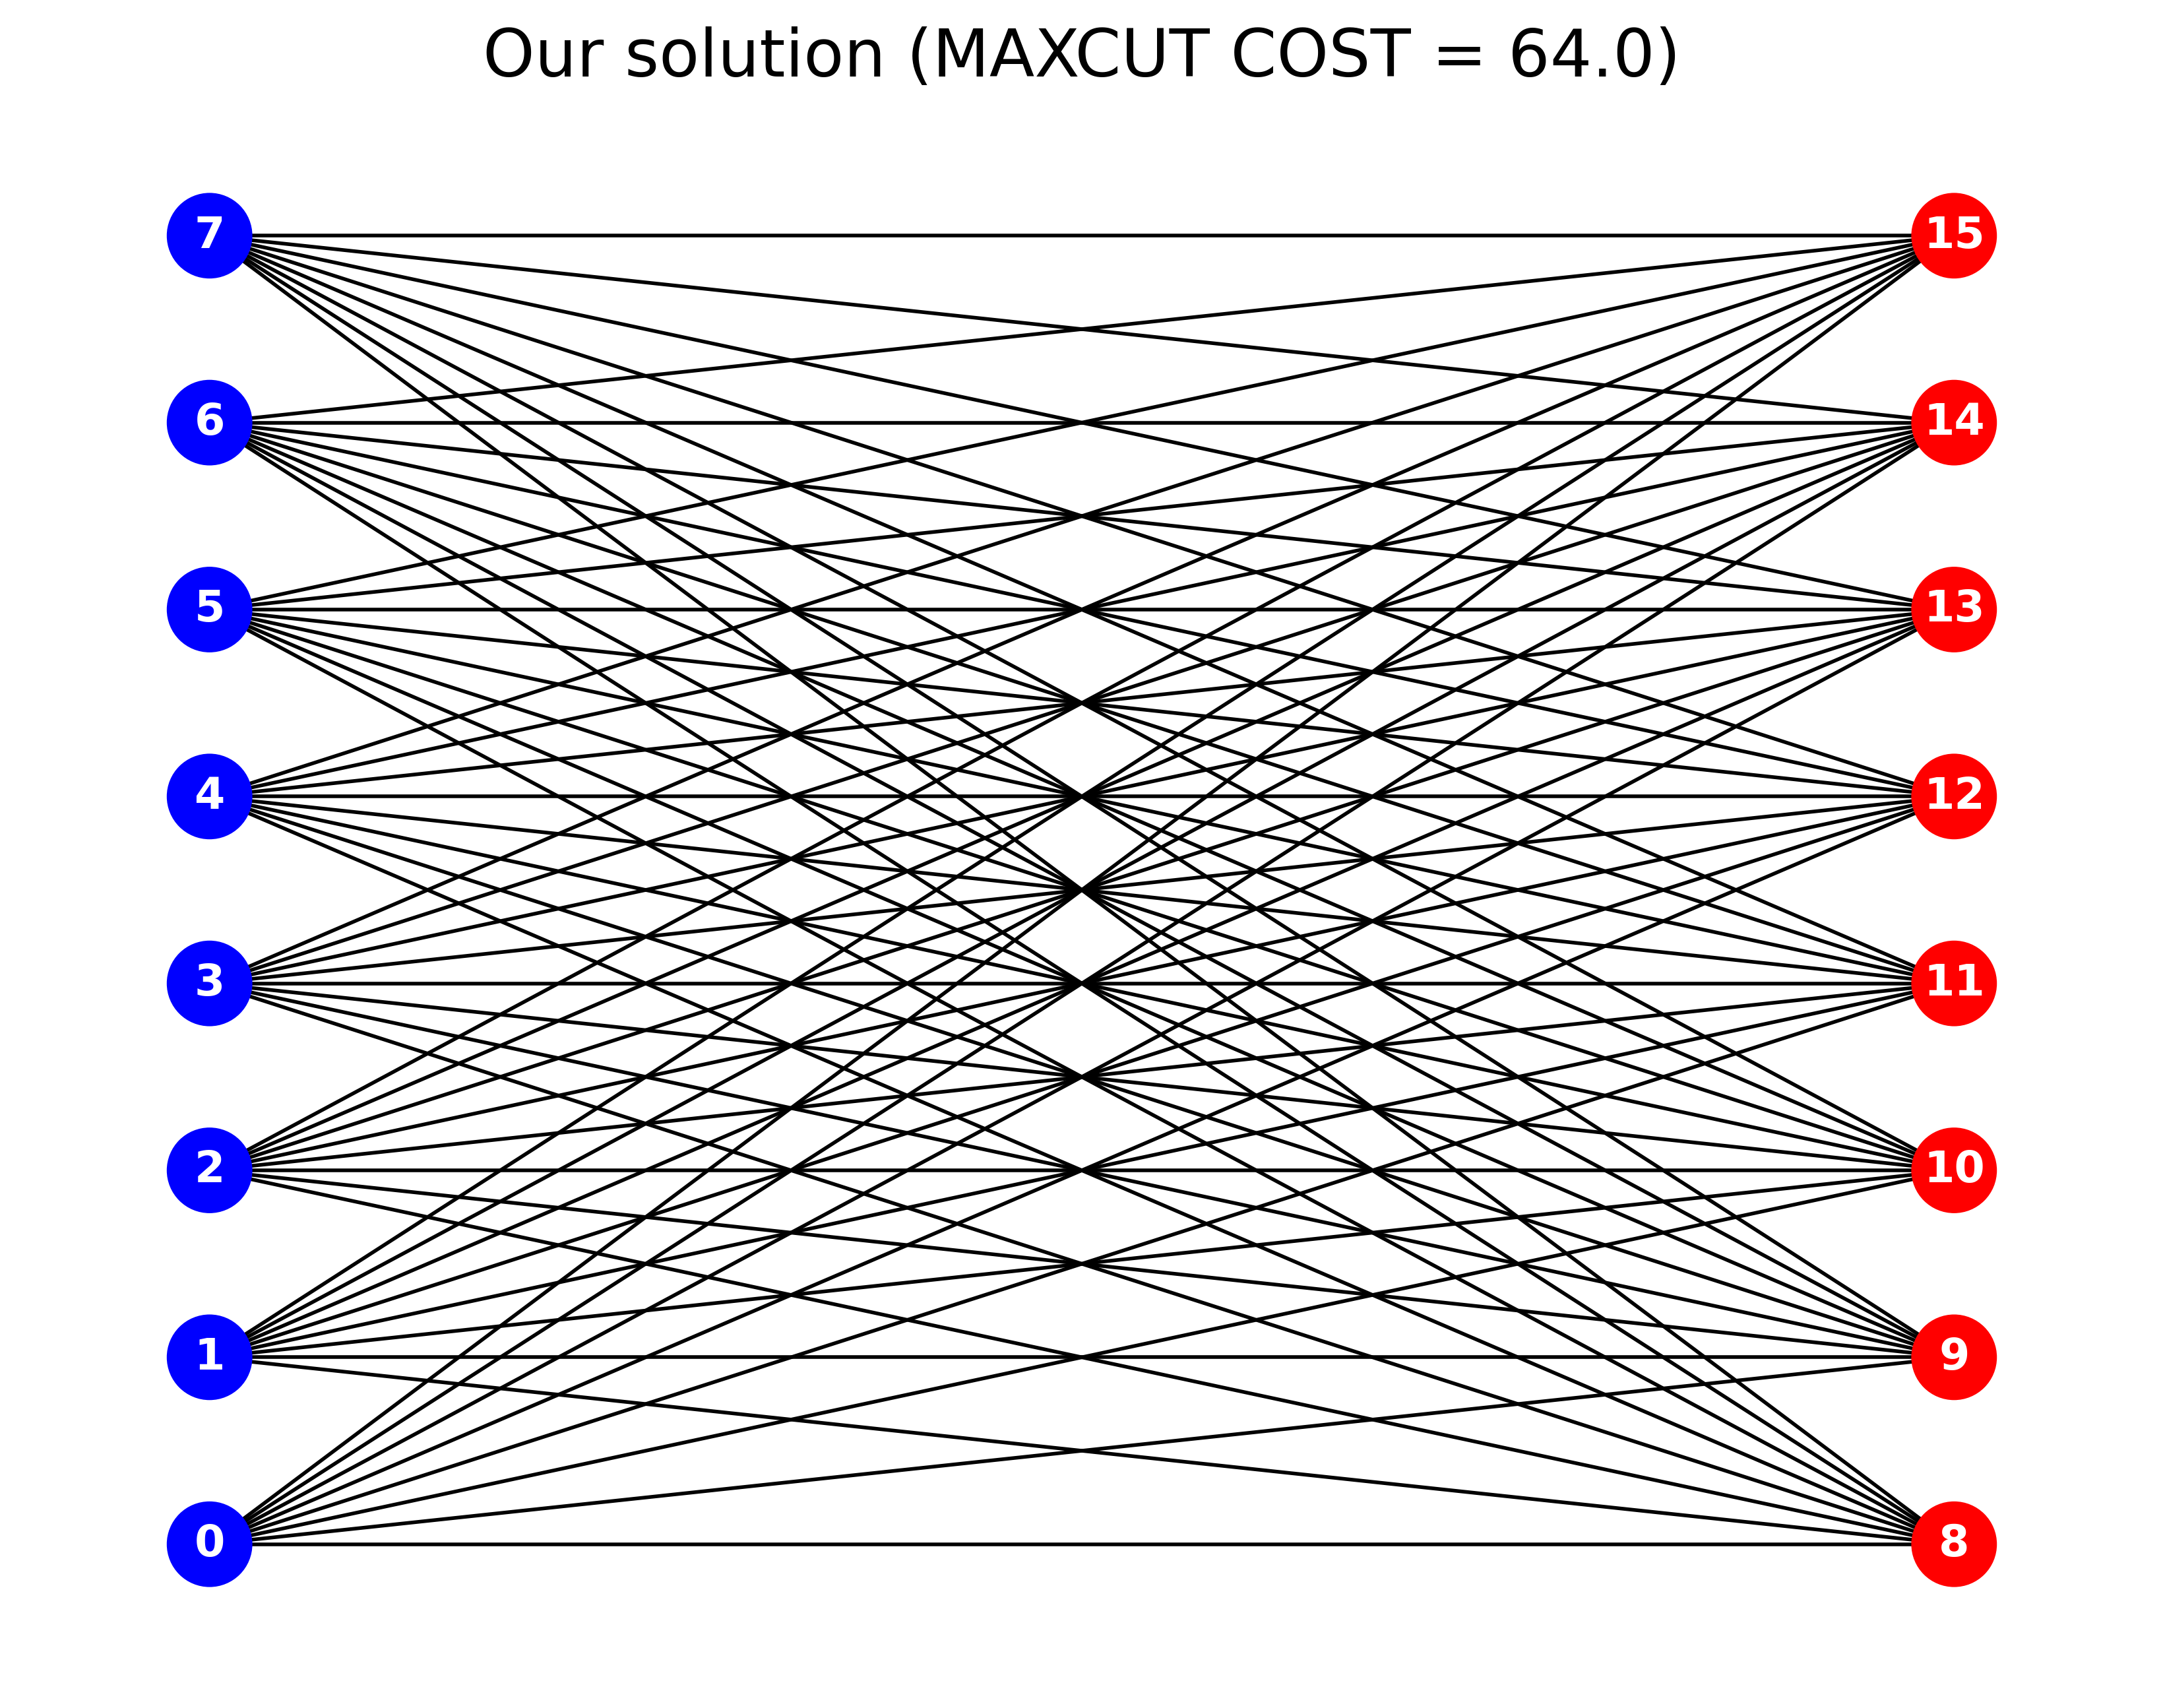

In [38]:
node_list = list(G.nodes())
node_colors_map = dict(zip(node_list, x_our))

for node, color_val in node_colors_map.items():
    G.nodes[node]['color'] = color_val

color_map_for_drawing = ['red' if node_colors_map[node] == 0 else 'blue' for node in node_list]

# Визуализация
plt.figure(figsize=(8, 6), dpi = 400)
pos = nx.bipartite_layout(G, nodes=range(8))  # или другой layout, например, nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color=color_map_for_drawing, node_size=500, font_color='white', font_weight='bold')
plt.title(f"Our solution (MAXCUT COST = {our_cost})", fontsize = 18)
plt.show()

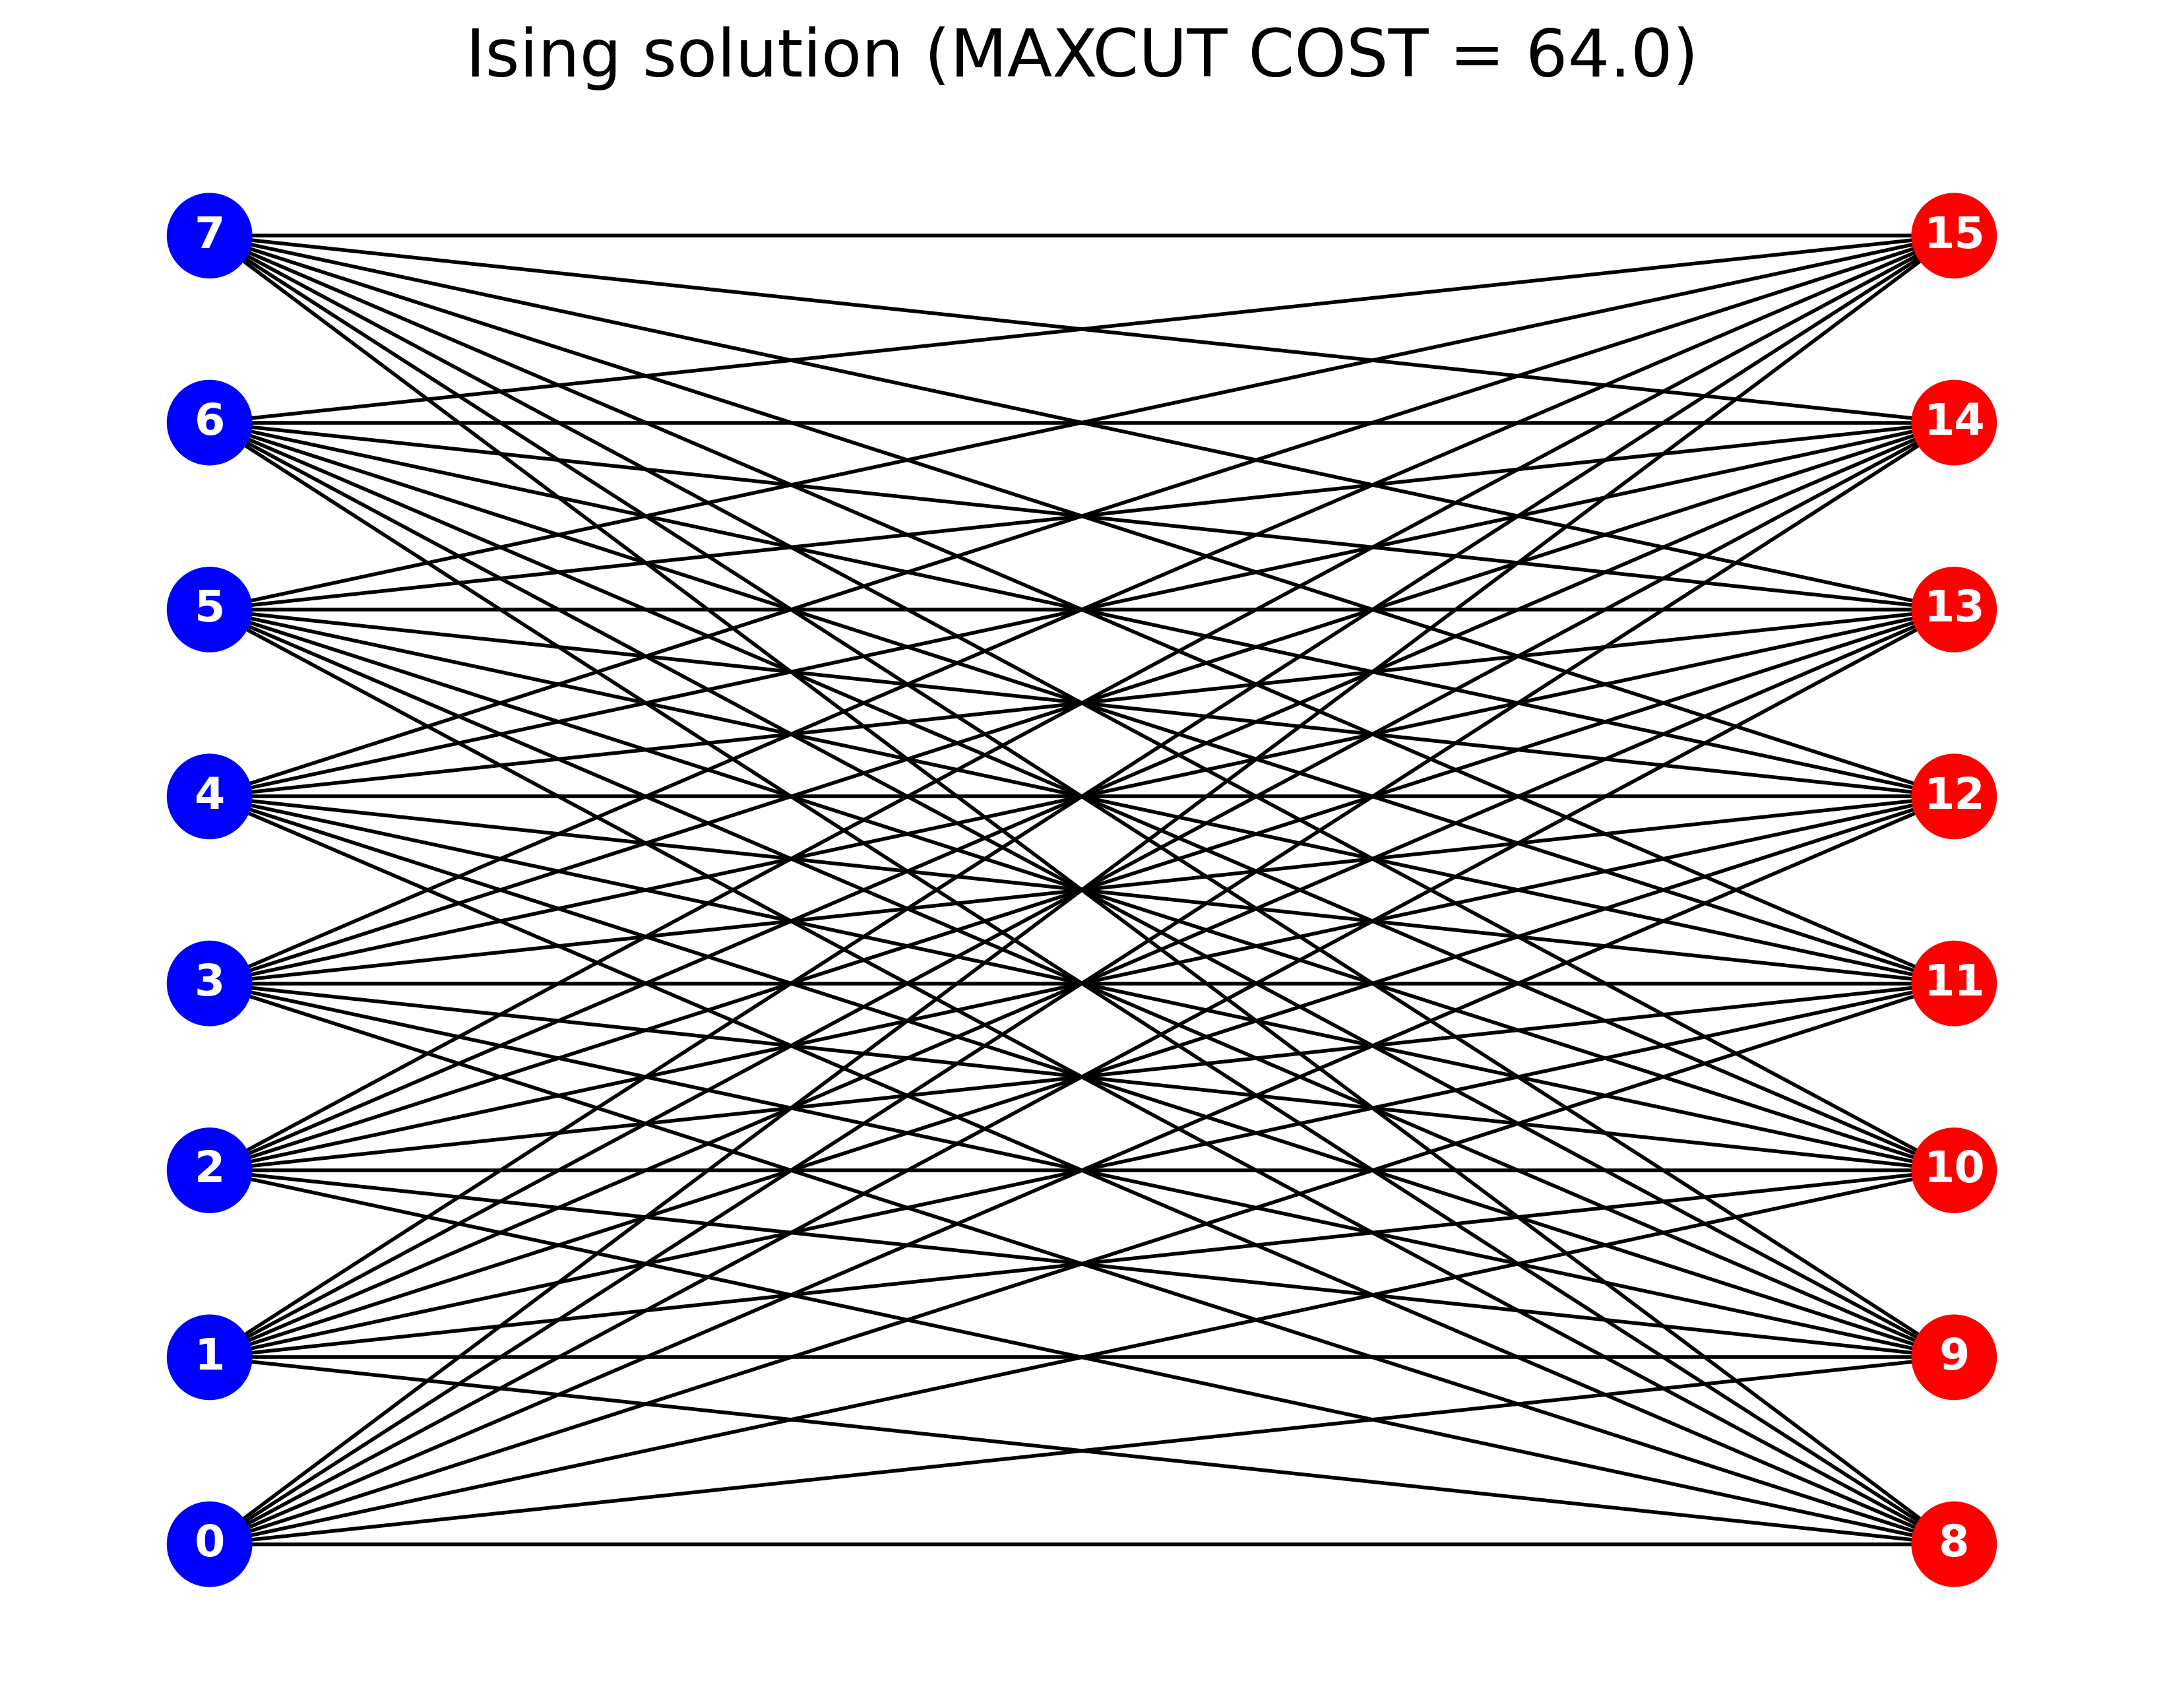

In [39]:
node_list = list(G.nodes())
node_colors_map = dict(zip(node_list, x_ising))

for node, color_val in node_colors_map.items():
    G.nodes[node]['color'] = color_val

color_map_for_drawing = ['red' if node_colors_map[node] == 0 else 'blue' for node in node_list]


plt.figure(figsize=(8, 6), dpi=400)
pos = nx.bipartite_layout(G, nodes=range(8))  # или другой layout, например, nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color=color_map_for_drawing, node_size=500, font_color='white', font_weight='bold')
plt.title(f"Ising solution (MAXCUT COST = {our_cost})", fontsize = 18)
plt.show()